# Алгоритмы машинного обучения 

In [73]:
# https://stepik.org/course/68260/syllabus

## Содержание

[2.1 Линейная регрессия](#2.1)  
[2.1.1 Инициализация](#2.1.1)  
[2.1.2 Обучение](#2.1.2)  
[2.1.3 Предсказание](#2.1.3)  
[2.1.4 Метрики](#2.1.4)  
[2.1.5 Регуляризация](#2.1.5)   
[2.1.6 Скорость обучения](#2.1.6)  
[2.1.7 Стохастический градиентный спуск](#2.1.7)  

[2.2 Логистическая регрессия](#2.2)  
[2.2.1 Инициализация класса логистической регрессии](#2.2.1)  
[2.2.2 Обучение](#2.2.2)  
[2.2.3 Предсказание](#2.2.3)  
[2.2.4 Метрики классификации](#2.2.4)  
[2.2.5 Регуляризация](#2.2.5)  
[2.2.6 Скорость обучения](#2.2.6)  
[2.2.7 Стохастический градиентный спуск](#2.2.7)  

[Финальные версии моделей](#fin)

## 2.1 Линейная регрессия<a id='2.1'></a> 

In [1]:
import pandas as pd
import numpy as np

import random

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=14, n_informative=10, noise=15, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]

In [3]:
X.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13
0,1.191261,-0.308960,0.675137,-1.460501,0.053059,-1.886129,2.710794,-1.716033,0.865290,0.138078,-0.063745,-2.104583,-0.476876,1.677116
1,1.071476,-1.424766,-1.109750,-0.457677,0.399997,1.587401,-1.547570,0.323247,0.165859,-0.302097,0.203944,-0.212452,0.836991,0.368498
2,-0.045929,1.868603,-0.016568,-0.484258,1.089905,-1.147160,0.590744,0.683325,-0.571184,-0.802199,-0.220114,0.034808,0.043829,0.955803


In [4]:
y.head(3)

0    -48.005272
1    145.801614
2    -49.114775
dtype: float64

### 2.1.1 Инициализация класса линейной регрессии<a id='2.1.1'></a> 

Приступим к реализации. И первое, что мы сделаем — это создадим класс MyLineReg.  

Данный класс при инициализации должен принимать на вход два параметра:  

* n_iter — количество шагов градиентного спуска. По-умолчанию: 100;  
* learning_rate — коэффициент скорости обучения градиентного спуска. По-умолчанию: 0.1.  

При обращении к экземпляру класса (или при передачи его в функцию print) необходимо распечатать строку по следующему шаблону (строго в таком виде):  

```python
MyLineReg class: n_iter=<n_iter>, learning_rate=<learning_rate>
```

In [5]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: float = 0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        return "MyLineReg class: n_iter={}, learning_rate={}".format(self.n_iter, self.learning_rate)

In [6]:
a = MyLineReg(n_iter = 10, learning_rate = 0.5)
print(a)

MyLineReg class: n_iter=10, learning_rate=0.5


In [7]:
b = MyLineReg()
print(b)

MyLineReg class: n_iter=100, learning_rate=0.1


### 2.1.2 Обучение<a id='2.1.2'></a> 

Пора научить нашу модель чему-то полезному :) Что для это нужно сделать:  

1) В инициализатор класса добавить новый параметр — weights — который будет хранить веса модели. По умолчанию он ничего не содержит.  
2) Вам необходимо реализовать метод fit в Вашем классе. Данный метод должен делать следующее:  
   1. На вход принимать три атрибута:  
        - X — все фичи в виде датафрейма пандаса. Примечание: даже если фича будет всего одна это все равно будет датафрейм, а не серия.  
        - y — целевая переменная в виде пандасовской серии.  
        - verbose — указывает на какой итерации выводить лог. Например, значение 10 означает, что на каждой 10 итерации градиентного спуска будет печататься лог. Значение по умолчанию: False (т.е. ничего не выводится).  

    2. Дополнить переданную матрицу фичей единичным столбцом слева.  
    3. Определить сколько фичей передано и создать вектор весов, состоящий из одних единиц соответствующей длинны: т.е. количество фичей+1.  
    4. Дальше в цикле (до n_iter):  
        - Предсказать y^  
        - Посчитать ошибку (MSE)  
        - Вычислить градиент  
        - Сделать шаг размером learning rate в противоположную от градиента сторону  
        - Сохранить обновленные веса внутри класса  
    5. В процессе обучения необходимо выводить лог, в котором указывать номер итерации и значение функций потерь:  
        ```
        start | loss: 42027.65
        100 | loss: 1222.87
        200 | loss: 232.17
        300 | loss: 202.4
        ```
        где start - значении функции потерь до начала обучения. Далее выводится каждое i-ое значение итерации переданное в параметре verbose. Если verbose = False, то лог не выводится вовсе.  
        З.Ы. Данный вывод никак проверяться не будет. Он в основном нужен для отладки. Поэтому можете модифицировать его внешний вид под свои нужды.  
    6. Метод ничего не возвращает.  
    
    
3) Необходимо реализовать метод get_coef, который будет возвращать значения весов в виде вектора NumPy, начиная со второго значения. Первое значение нам не нужно, потому что оно соответствует фиктивной фиче (единичке). Все же остальные могут использоваться для оценки важности фичей.  

**Проверка**:  

**Входные данные**: несколько наборов параметров для линейной регрессии  
**Выходные данные**: коэффициенты обученной линейной регрессии (их среднее)  

In [8]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: float = 0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        return "MyLineReg class: n_iter={}, learning_rate={}".format(self.n_iter, self.learning_rate)
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  # Единичный стобец слева
        W = np.ones(X.shape[1]) # вектор весов, состоящий из одних единиц
        
        # в цикле (до n_iter)
        for iteration in range(1, self.n_iter + 1):  
            # Предсказать y^
            y_pred = X @ W
            # Посчитать ошибку (MSE)
            MSE =  (1 / len(y)) * (y_pred**2 - y**2).sum() 
            # Вычислить градиент
            grad = (2 / len(y)) * ((y_pred - y) @ X) 
            # Сделать шаг размером learning rate в противоположную от градиента сторону
            grad_step = (- self.learning_rate) * grad 
            W += grad_step
            
            # Выводить лог, в котором указывать номер итерации и значение функций потерь
            if verbose:
                if iteration == 1:
                    print('start|loss:', np.round(MSE,2))
                elif (iteration % verbose == 0) & (iteration != 1): 
                    print('{}|loss'.format(iteration), np.round(MSE,2))
                    
        # Сохранить обновленные веса внутри класса
        self.weights = W
    
    # Возвращает значения весов в виде вектора NumPy, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]
        

In [9]:
b = MyLineReg(50, 0.1)

In [10]:
b.fit(X,y, 5)

start|loss: -21392.83
5|loss -13957.49
10|loss -5681.06
15|loss -2210.61
20|loss -937.67
25|loss -481.99
30|loss -318.3
35|loss -258.82
40|loss -236.9
45|loss -228.71
50|loss -225.61


In [11]:
b.get_coef()

col_0     42.918088
col_1     16.596470
col_2      0.497913
col_3     65.371968
col_4     47.591063
col_5     61.776303
col_6      0.246265
col_7     -0.107810
col_8     60.012217
col_9     53.889591
col_10    -0.472909
col_11    14.426826
col_12    17.682723
col_13    47.315290
dtype: float64

In [12]:
np.mean(b.get_coef())

30.55314269483333

### 2.1.3 Предсказание<a id='2.1.3'></a> 

Ну, и третьим (обязательным) шагом мы научим нашу модель выдавать предсказания...  

Добавьте в класс MyLineReg метод predict. Данный метод должен делать следующее:  

1. На вход принимать матрицу фичей в виде датафрейма пандаса.  
2. Дополнять матрицу фичей единичным вектором (первый столбец).  
3. Возвращать вектор предсказаний.  
Напомню, что предсказание выполняется следующим образом: y^ = XW, где: X - матрица фичей, W - вектор весов.  

**Проверка**:  

**Входные данные**: три датасета с различными параметрами (сгенерированными посредством метода make_regression из scikit-learn)  
**Выходные данные**: возвращенные предсказания (их сумма)

In [13]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: float = 0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)
        
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  # Единичный стобец слева
        W = np.ones(X.shape[1]) # вектор весов, состоящий из одних единиц
        
        # в цикле (до n_iter)
        for iteration in range(1, self.n_iter + 1):  
            # Предсказать y^
            y_pred = X @ W
            # Посчитать ошибку (MSE)
            MSE =  (1 / len(y)) * (y_pred**2 - y**2).sum() 
            # Вычислить градиент
            grad = (2 / len(y)) * ((y_pred - y) @ X) 
            # Сделать шаг размером learning rate в противоположную от градиента сторону
            grad_step = (- self.learning_rate) * grad 
            W += grad_step
            
            # Выводить лог, в котором указывать номер итерации и значение функций потерь
            if verbose:
                if iteration == 1:
                    print('start|loss:', np.round(MSE,2))
                elif (iteration % verbose == 0) & (iteration != 1): 
                    print('{}|loss'.format(iteration), np.round(MSE,2))
                    
        # Сохранить обновленные веса внутри класса
        self.weights = W
    
    def predict(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  # Единичный стобец слева
        return X @ self.weights
    
    
    # Возвращает значения весов в виде вектора NumPy, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]

In [14]:
b = MyLineReg(400, 0.1)

In [15]:
b.fit(X, y)
b.predict(X).head(5)

0    -61.951216
1    131.681917
2    -52.076074
3     23.448017
4   -131.737612
dtype: float64

In [16]:
y.head(5)

0    -48.005272
1    145.801614
2    -49.114775
3     24.902238
4   -152.611643
dtype: float64

In [17]:
b.predict(X).sum()

2320.390966314855

### 2.1.4 Метрики<a id='2.1.4'></a> 

**Mean Absolute Error (MAE)**  
Средняя абсолютная ошибка.  
$$\large
MAE = \frac{1}{n} \sum_{i=1}^n{|y_i - \hat y_i|} 
$$  

где:  
* y – фактическое i-ое значение целевой переменной;  
* y^ – предсказанное i-ое значение целевой переменной;  
* n – количество наблюдений.  

По сравнению с MSE, MAE хуже "борется" с выбросами. Но MAE гораздо лучше интерпретируется: по сути это просто средняя ошибка вашей модели в абсолютных величинах.  

**Root Mean Squared Error (RMSE)**  
Квадратный корень из среднеквадратичной ошибки.  
$$\large
RMSE = \sqrt {\frac{1}{n} \sum_{i=1}^n{(y_i - \hat y_i)^2} }
$$  
RMSE это по сути тот же MSE, только из него берут корень, чтобы размерность была схожа с исходными данными.  

**Коэффициент R^2**  
... или Коэффициент детерминации.  
$$\large
R^2 = 1 - \frac{\sum_{i=1}^n{(y_i -\hat y_i)^2}}{\sum_{i=1}^n{(y_i -\bar y_i)^2}}
$$  
где:  
* y-  – среднее значение целевой переменной.  

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.  

**Mean Absolute Percentage Error (MAPE)**  
$$\large
MAPE = \frac{100}{n} \sum_{i=1}^n{\begin{vmatrix}\frac {y_i - \hat y_i}{y_i}\end{vmatrix}}
$$  
Это коэффициент, не имеющий размерности, с очень простой интерпретацией. Его можно измерять в долях или процентах. Если у вас получилось, например, что MAPE = 11.4%, то это говорит о том, что ошибка составила 11,4% от фактических значений. Основная проблема данной ошибки — нестабильность. Из-за деления на фактические значения эта метрика чувствительна к масштабу. Так, фактическое значение близко к нулю, то из-за деления на очень маленькое число расчетное значение для конкретного примера — взлетит. Помимо этого, ошибка является несимметричной: одинаковые отклонения в плюс и в минус по-разному влияют на показатель ошибки.  

### Реализация  

Теперь реализуем метрики на практике:  

1. Добавьте в класс MyLineReg параметр metric, который будет принимать одно из следующих значений:  
    - mae  
    - mse  
    - rmse  
    - mape  
    - r2  
    По умолчанию: None  
    
2. При обучении добавьте в вывод расчет метрики:  
```
start | loss: 42027.65 | <metric_name>: 234.65
100 | loss: 1222.87 | <metric_name>: 114.35
200 | loss: 232.17 | <metric_name>: 58.2
300 | loss: 202.4 | <metric_name>: 46.01
```
Если метрика не задана, то ничего дополнительно выводить не нужно.  

3. Добавьте метод get_best_score, который возвращает последнее значение метрики (т.е. уже полностью обученной модели).  

*Примечания:  

*Хотя мы теперь отслеживаем и другие метрики, градиентный спуск все равно выполняется по среднеквадратичной ошибке.  
*Зачем мы добавили метрику MSE если у нас и так функция потерь это MSE? Во-первых, функцией потерь может быть не только MSE. Во-вторых, далее мы добавим к функции потерь регуляризацию, которая будет влиять на ее результат. А на метрику регуляризация влиять не должна.*  

**Проверка**:  

**Входные данные**: названия всех метрик  
**Выходные данные**: значение метрики полученное после обучения модели

In [18]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: float = 0.1, metric: str = None):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric
        self.weights = None
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)
    
    
    # Cреднеквадратичная ошибка
    @staticmethod
    def _mse(y_true: np.array, y_pred: np.array):
        # mse =  (1 / len(y)) * ((y_pred - y)**2).sum()
        return (y_true - y_pred).pow(2).mean()
    
    # Квадратный корень из среднеквадратичной ошибки
    @staticmethod
    def _rmse(y_true: np.array, y_pred: np.array):
        # rmse = np.sqrt((1 / len(y)) * ((y_pred - y)**2).sum())
        return np.sqrt((y_true - y_pred).pow(2).mean())
    
    # Средняя абсолютная ошибка
    @staticmethod
    def _mae(y_true: np.array, y_pred: np.array):
        # mae = (1 / len(y)) * abs(y - y_pred).sum()
        return (y_true - y_pred).abs().mean()

    # Cредняя абсолютная ошибка в процентах
    @staticmethod
    def _mape(y_true: np.array, y_pred: np.array):
        # mape = 100/len(y) * abs((y - y_pred) / y).sum()
        return 100 * ((y_true - y_pred) / y_true).abs().mean()

    # Коэффициент детерминации
    @staticmethod
    def _r2(y_true: np.array, y_pred: np.array):
        # r2 = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())
        return 1 - (y_true - y_pred).pow(2).sum() / ((y_true - y_true.mean()).pow(2).sum())


    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  # Единичный стобец слева
        self.weights = np.ones(X.shape[1]) # вектор весов, состоящий из одних единиц
        
        # в цикле (до n_iter)
        for iteration in range(1, self.n_iter + 1):  
            # Предсказать y^
            y_pred = X @ self.weights
            # Среднеквадратичная ошибка
            mse = (y_pred - y).pow(2).mean()
            # Вычислить градиент
            grad = (2 / len(y)) * ((y_pred - y) @ X) 
            # Сделать шаг размером learning rate в противоположную от градиента сторону
            grad_step = (- self.learning_rate) * grad 
            self.weights += grad_step
            
            # Выводить лог, в котором указывать номер итерации и значение функций потерь
            if self.metric:
                self.score = getattr(self, '_' + self.metric)(y, X @ self.weights)
                
            if verbose and iteration == 1:
                if self.metric:
                    print(f'start | loss: {np.round(mse, 2)} | {self.metric}: {np.round(self.score, 2)}')
                else:
                    print(f'{iteration} | loss: {np.round(mse, 2)}')
            if verbose and iteration % verbose == 0:
                if self.metric:
                    print(f'{iteration} | loss: {np.round(mse, 2)} | {self.metric}: {np.round(self.score, 2)}')
                else:
                    print(f'{iteration} | loss: {np.round(mse, 2)}')

        
    def predict(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  # Единичный стобец слева
        return X @ self.weights
    
    
    # Возвращает значения весов в виде вектора NumPy, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]
    
        
    # Возвращает последнее значение метрики
    def get_best_score(self):
        if self.metric in ['mae', 'mse', 'rmse', 'mape', 'r2']:
            return self.score
        else:
            raise ValueError('Invalid metric. Supported metrics: mae, mse, rmse, mape, r2')

In [19]:
b = MyLineReg(100, 0.1, 'mape')

In [20]:
b.fit(X, y, verbose = 10)

start | loss: 20621.09 | mape: 87.93
10 | loss: 657.74 | mape: 66.2
20 | loss: 231.51 | mape: 65.54
30 | loss: 223.84 | mape: 65.99
40 | loss: 223.67 | mape: 66.03
50 | loss: 223.67 | mape: 66.04
60 | loss: 223.66 | mape: 66.04
70 | loss: 223.66 | mape: 66.04
80 | loss: 223.66 | mape: 66.04
90 | loss: 223.66 | mape: 66.04
100 | loss: 223.66 | mape: 66.04


In [21]:
b.get_best_score()

66.03621931370053

### 2.1.5 Регуляризация<a id='2.1.5'></a> 

Абсолютно для всех алгоритмов машинного обучения регуляризация делает одно и то же — борется со сложностью модели. А чересчур сложная модель это прямой путь к переобучению. Но в разных алгоритмах сложность может проявляться по-разному. В линейных моделях сложность проявляется в больших значениях весов.  

Рассмотрим такой пример:  
$$\large
1x_0 + 10000x_1 + 2x_2 = y
$$  
Очевидно, что вес w1 оказывает очень сильное влияние на конечный результат, что делает модель не стабильной. И задача регуляризации в линейных моделях бороться с такими аномально большими значениями весов, уменьшая их. Достигается это путем штрафования функции потерь за большие веса. Рассмотрим три основные регуляризации в линейных моделях...  

**L1 регуляризация (или Lasso регрессия)**  
В L1 мы добавляем сумму модулей весов к функции потерь:  
$$\large
Loss = \frac{1}{n} \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda_1\ \sum_{j=1}^m{|w_j|}
$$  
Здесь λ (лямбда) отвечает за то, насколько сильно регуляризация будет влиять на модель.  
Градиент по функции MSE это вектор частных производных по независимым переменным. Теперь к нему добавился градиент по функции регуляризации:  
$$\large
\nabla\ (LassoMSE) = \nabla\ (MSE) + \lambda_1\ \nabla\ (\sum_{j=1}^m{|w_j|})
$$  
$$\large
\nabla\ (LassoMSE) = \begin{pmatrix} \frac{∂ MSE}{∂ w_0} \\ \frac{∂ MSE}{∂ w_1} \\ \vdots \\ \frac{∂ MSE}{∂ w_m} \end{pmatrix} 
+
\lambda_1\ \begin{pmatrix} \frac{∂ L1}{∂ w_0} \\ \frac{∂ L1}{∂ w_1} \\ \vdots \\ \frac{∂ L1}{∂ w_m} \end{pmatrix} 
$$
$$\large
\frac{∂ L1}{∂ W_m} = \frac{w_m}{|w_m|} = sgn(w_m)
$$

Соответственно градиент будет таким:  
$$\large
\nabla\ (LassoMSE) = \begin{pmatrix}
                     \frac{2}{n} \sum_{i=1}^n{\hat y_i - y_i}x_{i0}\\
                     \frac{2}{n} \sum_{i=1}^n{\hat y_i - y_i}x_{i1}\\
                     \vdots \\
                     \frac{2}{n} \sum_{i=1}^n{\hat y_i - y_i}x_{im} \end{pmatrix}
                     + \lambda_1\
                     \begin{pmatrix}
                     sgn(w_0)\\
                     sgn(w_1)\\
                     \vdots \\
                     sgn(w_m) \end{pmatrix}
$$  
                     
$$\large
sgn(w) = \left\{ \begin{array}{ll}
                -1 & \mbox{if $w < 0$};\\ 
                0 & \mbox{if $w = 0$};\\ 
                1 & \mbox{if $w > 0$}.\end{array} \right.
$$

или в виде матричного перемножения:  
$$\large
\nabla\ (LassoMSE) = \frac{2}{n}(\hat Y - Y)X + \lambda_1\ sgn(W)
$$  
где W - вектор весов.  

**L2 регуляризация (или Ridge регрессия)**  
То же самое что и L1, только берется не модуль весов, а квадрат:  
$$\large
Loss = \frac{1}{n} \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda_2\ \sum_{j=1}^m{w_j^2}
$$  

А градиент, соответственно, будет таким:  
$$\large
\nabla\ (RidgeMSE) = \frac{2}{n}(\hat Y - Y)X + \lambda_2\ 2W
$$  

**ElasticNet**  
Это комбинация регуляризаций L1 и L2:  
$$\large
Loss = \frac{1}{n} \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda_1\ \sum_{j=1}^m{|w_j|} + \lambda_2\ \sum_{j=1}^m{w_j^2}
$$   

Градиент:  
$$\large
\nabla\ (ElasticNetMSE) = \frac{2}{n}(\hat Y - Y)X + \lambda_1\ sgn(W) + \lambda_2\ 2W
$$  

### Реализация  

1. Добавьте в класс MyLineReg три параметра:  
    * reg – принимает одно из трех значений: l1, l2, elasticnet. По умолчанию: None;  
    * l1_coef – принимает значения от 0.0 до 1.0. По умолчанию: 0;  
    * l2_coef – принимает значения от 0.0 до 1.0. По умолчанию: 0.  
2. Добавьте регуляризацию к вычислению лоса.  
3. Добавьте регуляризацию к вычислению градиента.  

*Примечания:*
* Для вычисления регуляризации L1 вам нужно задать reg="l1" и указать только l1_coef.  
* Для вычисления L2 вам нужно задать reg="l2" и указать только l2_coef.  
* Для вычисления Elasticnet вам нужно задать reg="elasticnet" и указать оба параметра l1_coef и l2_coef. 


**Проверка**:  

**Входные данные**: три вида регуляризации и одна модель без регуляризации (None).  
**Выходные данные**: коэффициенты обученной линейной регрессии (их сумма).

In [22]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: float = 0.1, 
                 metric: str = None, reg: str = None, 
                 l1_coef: float = 0, l2_coef: float = 0 ):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric
        self.weights = None
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])

        for iteration in range(1, self.n_iter + 1): 
            y_pred = X @ self.weights
            mse = (y_pred - y).pow(2).mean() + self.get_loss_reg(y_pred, y)
            grad = self.get_grad(y_pred, y, X)
                
            # шаг размером learning rate в противоположную от градиента сторону
            grad_step = (- self.learning_rate) * grad 
            self.weights += grad_step
            
            # Вывод логa, в котором указывается номер итерации и значение функций потери  
            self.score = self.get_loss_metric(X @ self.weights, y) + self.get_loss_reg(X @ self.weights, y)
            if verbose and (iteration == 1) | (iteration % verbose == 0):
                if self.metric:
                    print(f'{iteration} | {self.metric}: {np.round(self.score,2)}')
                else:
                    print(f'{iteration} | mse: {np.round(self.score,2)}')
                    
    # Рассчет среднеквадратичной ошибки
    def  get_loss_reg(self, y_pred, y):
        # Без регуляризации
        if self.reg == None:
            return 0
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            return self.l1_coef * abs(self.weights).sum()
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return self.l2_coef * (self.weights**2).sum()
        # ElasticNet
        elif self.reg == 'elasticnet':
            return (self.l1_coef * abs(self.weights).sum()) + (self.l2_coef * (self.weights**2).sum())
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет градиента
    def get_grad(self, y_pred, y, X):
        # Без регуляризации
        if self.reg == None:
            return (2 / len(y)) * ((y_pred - y) @ X) 
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            sgn_weights = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1])
            return (2 / len(y)) * ((y_pred - y) @ X) + (self.l1_coef * sgn_weights)
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return (2 / len(y)) * ((y_pred - y) @ X) + (self.l2_coef * 2 * self.weights)
         # ElasticNet
        elif self.reg == 'elasticnet':
            sgn_weights = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1])
            return (2 / len(y)) * ((y_pred - y) @ X) + (self.l1_coef * sgn_weights) + (self.l2_coef * 2 * self.weights)
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
            
    def get_loss_metric(self, y_pred, y):
        # Cреднеквадратичная ошибка
        if (self.metric == None) | (self.metric == 'mse'):
            return (y - y_pred).pow(2).mean()
        elif self.metric == 'rmse':
            return np.sqrt((y - y_pred).pow(2).mean())
        # Средняя абсолютная ошибка
        elif self.metric == 'mae':
            return (y - y_pred).abs().mean()
        # Cредняя абсолютная ошибка в процентах
        elif self.metric == 'mape':
            return 100 * ((y - y_pred) / y).abs().mean()
        # Коэффициент детерминации
        elif self.metric == 'r2':
            return 1 - (y - y_pred).pow(2).sum() / ((y - y.mean()).pow(2).sum())
        raise ValueError('Invalid metric. Supported metrics: mae, mse, rmse, mape, r2')


    def predict(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1)
        return X @ self.weights
    
    
    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]
    
        
    # Возвращает последнее значение метрики
    def get_best_score(self):
        return self.score

In [23]:
b = MyLineReg(50, 0.1, reg = 'elasticnet')
b.fit(X, y, verbose = 5)

1 | mse: 13360.33
5 | mse: 2554.8
10 | mse: 510.87
15 | mse: 261.58
20 | mse: 228.99
25 | mse: 224.45
30 | mse: 223.79
35 | mse: 223.68
40 | mse: 223.67
45 | mse: 223.67
50 | mse: 223.67


### 2.1.6 Скорость обучения<a id='2.1.6'></a>

До сих пор у нас была статичная скорость обучения. Но это может быть не оптимальным. Слишком большое значение чревато тем, что мы либо проскочим минимум, либо вовсе будем отдаляться от него. Слишком малое значение приведет к длительному процессу обучения. Более разумным было бы динамически менять шаг обучения в зависимости от сделанного количества шагов: в начале двигаемся быстро, чтобы ускорить обучение, под конец замедляемся, чтобы не пропустить минимум.  
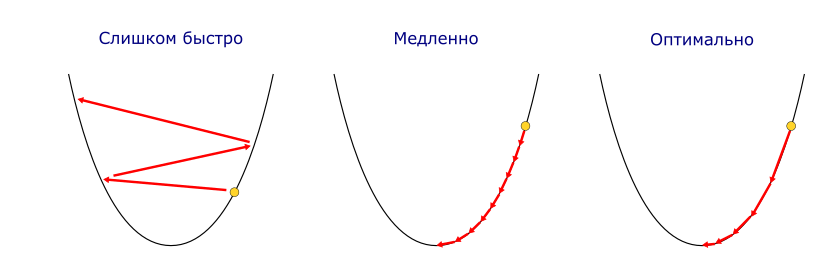  

### Реализация

Возьмите код из предыдущего шага и модифицируйте в нем параметр learning_rate следующим:  

* Если на вход пришло число, то работаем как и раньше.  
* Если на вход пришла lambda-функция, то вычисляем learning_rate на каждом шаге на основе переданной лямбда-функции.  
Можете дополнительно для контроля вывести значение learning_rate в лог тренировки.  

*Примечания:  
Т.к. у нас теперь результат зависит от нумерации шагов, то формализуем их нумерацию: они должна считаться от 1 до n_iter (включительно).*  
  
**Проверка**


**Входные данные**: три различных значения для скорости обучения, два из которых — динамические.  
**Выходные данные**: коэффициенты обученной линейной регрессии (их сумма).

In [24]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: [int, float] = 0.1, 
                 metric: str = None, reg: str = None, 
                 l1_coef: float = 0, l2_coef: float = 0 ):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric
        self.weights = None
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)
    
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])

        for iteration in range(1, self.n_iter + 1): 
            y_pred = X @ self.weights
            mse = (y_pred - y).pow(2).mean() + self.get_loss_reg(y_pred, y)
            grad = self.get_grad(y_pred, y, X)
            
            # шаг минимизации может быть динамически изменяемым
            step = self.learning_rate if type(self.learning_rate) in (int, float) else self.learning_rate(iteration) 
            self.weights += (- step) * grad 
            
            # Вывод логa, в котором указывается номер итерации и значение функций потери  
            self.score = self.get_loss_metric(X @ self.weights, y) + self.get_loss_reg(X @ self.weights, y)
            if verbose and (iteration == 1) | (iteration % verbose == 0):
                if self.metric:
                    print(f'{iteration}| {self.metric}: {np.round(self.score,2)}| step: {np.round(step,5)} |')
                else:
                    print(f'{iteration}| mse: {np.round(self.score,2)}| step: {np.round(step,5)} |')
                    
    # Рассчет среднеквадратичной ошибки
    def  get_loss_reg(self, y_pred, y):
        # Без регуляризации
        if self.reg == None:
            return 0
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            return self.l1_coef * abs(self.weights).sum()
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return self.l2_coef * (self.weights**2).sum()
        # ElasticNet
        elif self.reg == 'elasticnet':
            return (self.l1_coef * abs(self.weights).sum()) + (self.l2_coef * (self.weights**2).sum())
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет градиента
    def get_grad(self, y_pred, y, X):
        # Без регуляризации
        if self.reg == None:
            return (2 / len(y)) * ((y_pred - y) @ X) 
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            sgn_weights = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1])
            return (2 / len(y)) * ((y_pred - y) @ X) + (self.l1_coef * sgn_weights)
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return (2 / len(y)) * ((y_pred - y) @ X) + (self.l2_coef * 2 * self.weights)
         # ElasticNet
        elif self.reg == 'elasticnet':
            sgn_weights = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1])
            return (2 / len(y)) * ((y_pred - y) @ X) + (self.l1_coef * sgn_weights) + (self.l2_coef * 2 * self.weights)
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
            
    def get_loss_metric(self, y_pred, y):
        # Cреднеквадратичная ошибка
        if (self.metric == None) | (self.metric == 'mse'):
            return (y - y_pred).pow(2).mean()
        elif self.metric == 'rmse':
            return np.sqrt((y - y_pred).pow(2).mean())
        # Средняя абсолютная ошибка
        elif self.metric == 'mae':
            return (y - y_pred).abs().mean()
        # Cредняя абсолютная ошибка в процентах
        elif self.metric == 'mape':
            return 100 * ((y - y_pred) / y).abs().mean()
        # Коэффициент детерминации
        elif self.metric == 'r2':
            return 1 - (y - y_pred).pow(2).sum() / ((y - y.mean()).pow(2).sum())
        raise ValueError('Invalid metric. Supported metrics: mae, mse, rmse, mape, r2')


    def predict(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1)
        return X @ self.weights
    
    
    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]
    
        
    # Возвращает последнее значение метрики
    def get_best_score(self):
        return self.score

In [25]:
b = MyLineReg(50, lambda iter: 0.5 * (0.85 ** iter))

In [26]:
b.fit(X, y, verbose = 5)

1| mse: 926.72| step: 0.425 |
5| mse: 226.23| step: 0.22185 |
10| mse: 223.85| step: 0.09844 |
15| mse: 223.73| step: 0.04368 |
20| mse: 223.7| step: 0.01938 |
25| mse: 223.7| step: 0.0086 |
30| mse: 223.69| step: 0.00382 |
35| mse: 223.69| step: 0.00169 |
40| mse: 223.69| step: 0.00075 |
45| mse: 223.69| step: 0.00033 |
50| mse: 223.69| step: 0.00015 |


### Стохастический градиентный спуск<a id='2.1.7'></a> 

Это метод оптимизации, используемый в различных алгоритмах машинного обучения. Он призван ускорить и упростить процесс обучения. В реальных продуктовых задачах обучающая выборка может иметь довольно большой объем. И вычисление градиента функции потери может потребовать довольно много процессорного времени и других ресурсов компьютера. А это может существенно замедлить обучение модели. Основная идея стохастического градиентного спуска (Stochastic Gradient Descent, SGD) состоит в том, что мы на каждом шаге вычисляем градиент функции потери не на всей обучающей выборке, а на небольшом ее подмножестве.  

При таком подходе на каждом конкретном шаге мы необязательно будем двигаться в сторону наискорейшего убывания функции. Мы будем двигаться к минимуму как бы зигзагами. Но будем. При этом шагов нам может потребоваться гораздо больше, чем при обычном градиентном спуске. Зато расчет каждого из них будет делаться значительно быстрее.  
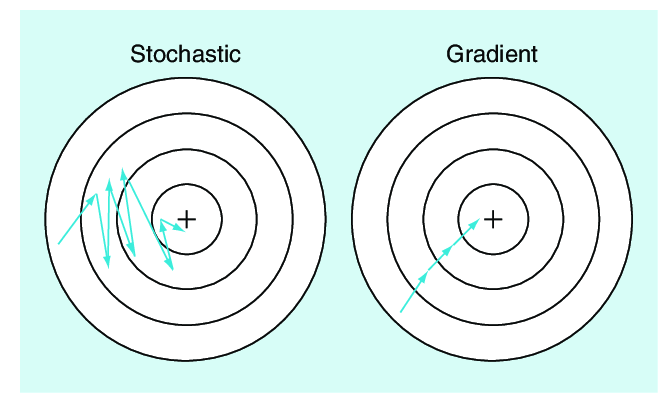  

Есть несколько вариаций стохастического градиентного спуска.  

1) Во-первых, выделяют подходы по количеству используемых объектов:  
    * Классический стохастический градиентный спуск предполагает использование на каждом шаге ровно одного образца из выборки.
    * Пакетный подход (Mini-Batch) – на каждом шаге мы используем пакет из небольшого числа элементов обучающей выборки. Это позволяет уменьшить излишнюю “стохастичность” (случайность) градиентного спуска.  
    
2) Во-вторых, SGD различаются по способу отбора объектов:
    * В одном варианте все экземпляры перебираются последовательно. Когда объекты заканчиваются перебор начинается сначала пока не будет достигнуто заданное кол-во итераций.
    * В другом варианте на каждом шаге формируется случайная подвыборка элементов.
    
В нашей реализации мы задействуем случайный отбор заданного количества элементов.

### Реализация

Добавьте в класс MyLineReg два новых параметра:  

* sgd_sample – кол-во образцов, которое будет использоваться на каждой итерации обучения. Может принимать либо целые числа, либо дробные от 0.0 до 1.0. По-умолчанию: None.  
* random_state – для воспроизводимости результата зафиксируем сид (об этом далее). По-умолчанию: 42.

Внесем изменение в алгоритм обучения:  
* В начале обучения фиксируем сид (см. ниже).  
* В начале каждого шага формируется новый мини-пакет, состоящий из случайно выбранных элементов обучающего набора. Кол-во отобранных элементов определяется параметром sgd_sample:  
    - Если задано целое число, то из исходного датасета берется ровно столько примеров сколько указано.  
    - Если задано дробное число, то рассматриваем его как долю от количества строк в исходном датасете (округленное до целого числа).  
* Расчет градиента (и последующее изменение весов) делаем на основе мини-пакета.  
* Все остальные параметры, если они заданы (например, регуляризация), также должны учитываться при обучении.  
* Ошибку и метрику необходимо считать на всем датасете, а не на мини-пакете.  
* Если sgd_sample = None, то обучение выполняется как раньше (на всех данных).  

**Случайная генерация**

Т.к. у нас формальная проверка кода, то у всех должны получиться одинаковые случайные подвыборки. Поэтому и способ у всех будет одинаковый.

В начале обучения посредством модуля random фиксируем сид:  
```python
random.seed(<random_state>)
```
В начале каждой итерации сформируем порядковые номера строк, которые стоит отобрать.  

```python
sample_rows_idx = random.sample(range(X.shape[0]), <sgd_sample>)
```
В этом случае при каждом запуске будут генерироваться одни и те же номера строк. Что позволит нам добиться воспроизводимости.  

З.Ы. Модуль random уже импортирован.  

**Тестирование**:  
**Входные данные**: различные значения параметра sgd_sample  
**Выходные данные**: коэффициенты обученной линейной регрессии (их среднее)

In [27]:
import random

In [28]:
class MyLineReg():
    
    def __init__(self, n_iter: int = 100, learning_rate: [int, float] = 0.1, 
                 metric: str = None, reg: str = None, 
                 l1_coef: float = 0, l2_coef: float = 0,
                 sgd_sample: [int, float] = None, random_state: int = 42):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric
        self.weights = None
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.sgd_sample = sgd_sample
        self. random_state = random_state
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        # Фиксируется сид
        random.seed(self.random_state)
        
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1): 
            # В начале каждого шага формируется новый мини-пакет, состоящий из случайно выбранных элементов
            X_batch, y_batch = self.get_batches(X, y, self.sgd_sample)
            
            y_pred = X_batch @ self.weights
            grad =  (2 / len(y_batch)) * ((y_pred - y_batch) @ X_batch) + self.get_grad_reg(y_pred, y_batch)
            
            # Шаг минимизации может быть динамически изменяемым
            step = self.learning_rate if type(self.learning_rate) in (int, float) else self.learning_rate(iteration) 
            self.weights += (- step) * grad 
            
            # Ошибка и метрика считаются на всем датасете
            y_pred_full = X @ self.weights
            mse = (y_pred_full - y).pow(2).mean() + self.get_loss_reg(y_pred_full, y)
            self.score = self.get_loss_metric(y_pred_full, y) + self.get_loss_reg(y_pred_full, y)
            # Вывод логa, в котором указывается номер итерации и значение функций потери 
            if verbose and (iteration == 1) | (iteration % verbose == 0):
                if self.metric:
                    print(f'{iteration}| {self.metric}: {np.round(self.score,2)}| step: {np.round(step,5)} |')
                else:
                    print(f'{iteration}| mse: {np.round(self.score,2)}| step: {np.round(step,5)} |')
                    
                    
    # Подготовка батчей(пакетов) для стохастического градиентного спуска
    def get_batches(self, X: np.ndarray, y: np.ndarray, sgd: [int, float, None]):
        # Если sgd - float, то берется доля от общего количества строк
        if isinstance(sgd, float):
            sample_rows_idx = random.sample(range(X.shape[0]), round(X.shape[0] * sgd))
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        # Если sgd - int, то берется ровно столько строк, сколько указано
        elif isinstance(sgd, int):
            sample_rows_idx = random.sample(range(X.shape[0]), sgd)
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        else:
        # В других случаях выборка не меняется
            X_batch, y_batch = X, y
        return X_batch, y_batch
                    
    # Рассчет среднеквадратичной ошибки
    def  get_loss_reg(self, y_pred, y):
        # Без регуляризации
        if self.reg == None:
            return 0
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            return self.l1_coef * abs(self.weights).sum()
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return self.l2_coef * (self.weights**2).sum()
        # ElasticNet
        elif self.reg == 'elasticnet':
            return (self.l1_coef * abs(self.weights).sum()) + (self.l2_coef * (self.weights**2).sum())
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет градиента
    def get_grad_reg(self, y_pred, y):
        # Без регуляризации
        if self.reg == None:
            return 0
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            sgn_weights = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1])
            return (self.l1_coef * sgn_weights)
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return (self.l2_coef * 2 * self.weights)
         # ElasticNet
        elif self.reg == 'elasticnet':
            sgn_weights = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1])
            return (self.l1_coef * sgn_weights) + (self.l2_coef * 2 * self.weights)
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет функции потерь
    def get_loss_metric(self, y_pred, y):
        # Cреднеквадратичная ошибка
        if (self.metric == None) | (self.metric == 'mse'):
            return (y - y_pred).pow(2).mean()
        elif self.metric == 'rmse':
            return np.sqrt((y - y_pred).pow(2).mean())
        # Средняя абсолютная ошибка
        elif self.metric == 'mae':
            return (y - y_pred).abs().mean()
        # Cредняя абсолютная ошибка в процентах
        elif self.metric == 'mape':
            return 100 * ((y - y_pred) / y).abs().mean()
        # Коэффициент детерминации
        elif self.metric == 'r2':
            return 1 - (y - y_pred).pow(2).sum() / ((y - y.mean()).pow(2).sum())
        raise ValueError('Invalid metric. Supported metrics: mae, mse, rmse, mape, r2')

    # Предсказание
    def predict(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1)
        return X @ self.weights
    
    
    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]
    
        
    # Возвращает последнее значение метрики
    def get_best_score(self):
        return self.score

In [29]:
b = MyLineReg(50, 0.1, sgd_sample = 0.1, random_state = 42)
b.fit(X, y, verbose = 5)

1| mse: 14708.52| step: 0.1 |
5| mse: 2589.49| step: 0.1 |
10| mse: 513.08| step: 0.1 |
15| mse: 259.94| step: 0.1 |
20| mse: 229.76| step: 0.1 |
25| mse: 226.9| step: 0.1 |
30| mse: 226.15| step: 0.1 |
35| mse: 225.67| step: 0.1 |
40| mse: 227.09| step: 0.1 |
45| mse: 228.16| step: 0.1 |
50| mse: 227.15| step: 0.1 |


In [30]:
b.get_coef()

array([42.67784933, 16.30583746, -0.56027037, 65.80070004, 47.77805113,
       61.90201149,  0.71549744, -0.26225734, 59.63006859, 54.00392483,
       -0.91032939, 13.83304496, 17.62747201, 46.7464898 ])

In [31]:
b.get_best_score().mean()

227.15154947470484

In [32]:
b.predict(X)

0      -62.889036
1      131.242767
2      -53.660872
3       23.096739
4     -133.044935
          ...    
995     57.595357
996     -0.329832
997     96.470588
998   -118.136690
999    203.047246
Length: 1000, dtype: float64

## 2.2 Логистическая регрессия<a id='2.2'></a> 

In [33]:
import pandas as pd
import numpy as np

import random

In [34]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=14, n_informative=10, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]

In [35]:
X.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13
0,0.212170,0.588157,0.373931,-1.213137,-0.431857,-1.805413,0.374652,-0.328778,1.662872,0.682909,-0.635783,-0.096290,-0.706476,1.475155
1,-2.136309,-0.340340,-1.518135,2.791709,-0.348785,-0.697299,-3.616860,-0.644757,-3.150791,0.153453,-1.975852,1.927038,-0.225723,1.335919
2,-2.995246,0.418912,-1.147293,4.705204,0.109306,-0.134241,0.297226,2.162918,-6.801806,1.573732,0.234367,-0.348181,-3.033989,-2.326364


In [36]:
y.head(3)

0    0
1    0
2    0
dtype: int32

**LogLoss**  
Минимизируют в логистической регрессии LogLoss. Она же Logarithmic loss. Она же логистическая функция потерь.  
$$\large
LogLoss = - \frac{1}{n} \sum_{i=1}^n{(y_i \log{(\hat y_i)} + (1 - y_i) \log{(1 - \hat y_i)})}
$$  

где:  
* yi – настоящее значение класса i-ого элемента;
* y^i – вероятность принадлежности i-ого элемента к классу 1;
* n – количество наблюдений.  

Вероятности мы получаем, пропуская нашу линейную функцию через сигмоиду. Линейная функция возвращает логиты – значения от −∞ до
+∞. Проходя через сигмоиду, значения переводится в диапазон от 0 до 1.  
$$\large
\hat y_i = \frac{1}{1 + e^{-z_i}}
$$  

$$\large
z_i = w_0x_{i0} + w_1x_{i1} + \dots + w_mx_{im}
$$  

Как мы помним из прошлого модуля, комбинацию весов и фичей можно записать в матричном виде, а значит наша сигмоида будет иметь вид:  
$$\large
\hat y = \frac{1}{1+ e^{-XW}}
$$

где:  
* W – вектор весов;  
* X – матрица фичей.

**Градиент**  
Градиент по функции логлосс такой:  
$$\large
\nabla\ (LogLoss) = \begin{pmatrix}
                    \frac{∂LogLoss}{∂w_0} \\
                    \frac{∂LogLoss}{∂w_1} \\
                     \vdots \\
                    \frac{∂LogLoss}{∂w_m} \end{pmatrix}
                    =
                    \begin{pmatrix}
                    \frac{1}{n} \sum_{i=1}^n{(\hat y_i - y_i)x_{i0}} \\
                    \frac{1}{n} \sum_{i=1}^n{(\hat y_i - y_i)x_{i1}}\\
                     \vdots \\
                    \frac{1}{n} \sum_{i=1}^n{(\hat y_i - y_i)x_{im}} \end{pmatrix}
$$  

Или в матричной форме:  
$$\large
\nabla\ (Logloss) = \frac{1}{n}(\hat Y - Y)X
$$  
где:  
Y^ – вектор предсказаний;  
Y – вектор фактических значений целевой переменной;  
X – матрица фичей;  
n – кол-во примеров.  

### 2.2.1 Инициализация класса логистической регрессии<a id='2.2.1'></a> 

Создайте класс с именем **MyLogReg**. Данный класс при инициализации должен принимать на вход два параметра:  

1. n_iter – количество шагов градиентного спуска. По-умолчанию: 10;  
2. learning_rate – коэффициент скорости обучения градиентного спуска. По-умолчанию: 0.1.

Все переданные (или дефолтные) параметры должны быть сохранены внутри класса.  

При обращении к экземпляру класса (или при передачи его в функцию print) необходимо распечатать строку по следующему шаблону:  

```python
MyLogReg class: n_iter=<n_iter>, learning_rate=<learning_rate>  
```

**Проверка**:  

**Входные данные**: различные исходные параметры логистической регрессии;  
**Выходные данные**: строка с распечатанным инстансом класса.  

In [37]:
class MyLogReg():
    
    def __init__(self, n_iter: int = 10, learning_rate: float = 0.1):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        return "MyLogReg class: n_iter={}, learning_rate={}".format(self.n_iter, self.learning_rate)

In [38]:
a = MyLogReg()
a

MyLogReg class: n_iter=10, learning_rate=0.1

In [39]:
b = MyLogReg(100, 0.1)
b

MyLogReg class: n_iter=100, learning_rate=0.1

### 2.2.2 Обучение<a id='2.2.2'></a> 

Реализуем обучение нашей модели:  

1. В инициализатор класса добавить новый параметр – **weights** – который будет хранить веса модели. По умолчанию он ничего не содержит.  
2. Вам необходимо реализовать метод fit в Вашем классе. Данный метод должен делать следующее:  
    1. На вход принимать три атрибута:  
        - X – все фичи в виде датафрейма пандаса. Примечание: даже если фича будет всего одна, это все равно будет датафрейм, а не серия.  
        - y – целевая переменная в виде пандасовской серии.  
        - verbose – указывает, на какой итерации выводить лог. Например, значение 10 означает, что на каждой 10 итерации градиентного спуска будет печататься лог. Значение по умолчанию = False (т.е. ничего не выводится).  
    2. Дополнить переданную матрицу фичей единичным столбцом слева.  
    3. Определить, сколько фичей передано и создать вектор весов, состоящий из одних единиц соответствующей длинны: т.е. количество фичей + 1.  
    4. Дальше в цикле (до n_iter):  
    - Предсказать y^.  
    - Посчитать ошибку (LogLoss).  
    - Вычислить градиент.  
    - Сделать шаг размером learning rate в противоположную от градиента сторону.  
    - Сохранить обновленные веса внутри класса.  
    
    5. В процессе обучения необходимо выводить лог, в котором указывать номер итерации и значение функций потерь:
        ```python
        start | loss: 42027.65
        100 | loss: 1222.87
        200 | loss: 232.17
        300 | loss: 202.4
        ```
        где start - значении функции потерь до начала обучения. Далее выводится каждое i-ое значение итерации, переданное в параметре verbose. Если verbose = False, то лог не выводится вовсе.  

    6. Метод ничего не возвращает.  
3. Необходимо реализовать метод get_coef, который будет возвращать значения весов в виде массива NumPy.  


**LogLoss**

В формуле LogLoss'а мы дважды вычисляем логарифм используя предсказания модели. И если аргумент логарифма будет равен нулю, то его вычисление выдаст: −inf.  

Чтобы избежать этого мы будем добавлять к предсказаниям очень малое число: eps = 1e-15  
Т.е. примерно так:  
log(y^i +eps) и log(1 − y^i + eps)  

**Проверка**:  

**Входные данные**: несколько наборов параметров для логистической регрессии;  
**Выходные данные**: коэффициенты обученной логистической регрессии (их среднее).

In [40]:
class MyLogReg():
    
    def __init__(self, n_iter: int = 10, learning_rate: float = 0.1):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # Предсказанное y = y^
            y_pred = (1 / (1 + np.exp(-X @ self.weights))) # сигмоида (перевод значений в диапазон от 0 до 1) 
            # Градиент
            grad =  (1 / len(y)) * ((y_pred - y) @ X)
            
            # Шаг минимизации
            step = self.learning_rate 
            self.weights += (- self.learning_rate) * grad 
            
            # Рассчет ошибки
            logloss = -(y * np.log(y_pred + self.eps) + (1 - y) * np.log(1 - y_pred + self.eps)).mean()  
            # Вывод логa, в котором указывается номер итерации и значение функций потери 
            if verbose and (iteration == 1) | (iteration % verbose == 0):
                print(f'{iteration}| LogLoss: {np.round(logloss,2)}')
    
    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]

In [41]:
a = MyLogReg(50, 0.1)
a

MyLogReg class: n_iter=50, learning_rate=0.1, weights=None, eps=1e-15

In [42]:
a.fit(X,y, verbose = 5)

1| LogLoss: 3.67
5| LogLoss: 2.68
10| LogLoss: 1.87
15| LogLoss: 1.43
20| LogLoss: 1.16
25| LogLoss: 0.97
30| LogLoss: 0.83
35| LogLoss: 0.73
40| LogLoss: 0.65
45| LogLoss: 0.6
50| LogLoss: 0.56


In [43]:
a.get_coef()

col_0     0.052474
col_1     0.635791
col_2     0.357072
col_3     0.203382
col_4    -0.714003
col_5     0.653062
col_6    -0.303532
col_7     0.742869
col_8     0.147269
col_9     0.164033
col_10    0.812389
col_11    0.016709
col_12    0.676633
col_13    1.218439
dtype: float64

In [44]:
np.mean(a.get_coef())

0.33304183715915026

### 2.2.3 Предсказание<a id='2.2.3'></a>

Научим модель выдавать предсказания. Добавьте в класс MyLogReg два метода predict и predict_proba. Оба метода должны делать следующее:  
1. На вход принимать матрицу фичей в виде датафрейма пандаса.  
2. Дополнять матрицу фичей единичным вектором (первый столбец).  
3. Возвращать вектор предсказаний. Но только с одним отличием:  
    1. predict_proba – возвращает вероятности (логиты прогнанные через функцию сигмоиды).  
    2. predict – переводит вероятности в бинарные классы по порогу > 0.5.  
   
**Проверка**:  

**Входные данные**: несколько датасетов с различными параметрами;  
**Выходные данные**: возвращенные предсказания (сумма для классов и среднее для вероятностей).   

In [45]:
class MyLogReg():
    
    def __init__(self, n_iter: int = 10, learning_rate: float = 0.1):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # Предсказанное y = y^
            y_pred = (1 / (1 + np.exp(-X @ self.weights))) # сигмоида (перевод значений в диапазон от 0 до 1) 
            # Градиент
            grad =  (1 / len(y)) * ((y_pred - y) @ X)
            
            # Шаг минимизации
            step = self.learning_rate 
            self.weights += (- self.learning_rate) * grad 
            
            # Рассчет ошибки
            logloss = -(y * np.log(y_pred + self.eps) + (1 - y) * np.log(1 - y_pred + self.eps)).mean()  
            # Вывод логa, в котором указывается номер итерации и значение функций потери 
            if verbose and (iteration == 1) | (iteration % verbose == 0):
                print(f'{iteration}| LogLoss: {np.round(logloss,2)}')
    
    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора W)
    def get_coef(self):
        return self.weights[1:]
 
    # Предсказание вероятности соотнесения к классу
    def predict_proba(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1) 
        return (1 / (1 + np.exp(-X @ self.weights)))
        
    # Перевод вероятностей в бинарные классы
    def predict(self, X: pd.DataFrame):  
        return np.where(self.predict_proba(X) > 0.5, 1, 0)

In [46]:
a = MyLogReg(50, 0.1)
a

MyLogReg class: n_iter=50, learning_rate=0.1, weights=None, eps=1e-15

In [47]:
a.fit(X, y, verbose = 10)

1| LogLoss: 3.67
10| LogLoss: 1.87
20| LogLoss: 1.16
30| LogLoss: 0.83
40| LogLoss: 0.65
50| LogLoss: 0.56


In [48]:
a.predict_proba(X)

0      0.672229
1      0.522446
2      0.051067
3      0.995597
4      0.976282
         ...   
995    0.093892
996    0.636997
997    0.110217
998    0.067724
999    0.744936
Length: 1000, dtype: float64

In [49]:
(a.predict_proba(X) > 0.5).sum()

611

In [50]:
a.predict(X).sum()

611

### 2.2.4 Метрики классификации<a id='2.2.4'></a>

* True Positive (TP) – количество положительных классов, которые правильно определены как положительные. Пример: письмо является спамом, и классификатор правильно отнес его к спаму.  
* False Negative (FN) – количество положительных классов, которые неправильно определены как отрицательные. Пример: письмо является спамом, но классификатор ошибочно определил его как не спам.  
* False positive (FP) – количество отрицательных классов, которые неправильно определены как положительные. Пример: письмо не является спамом, однако классификатор отнес его к спаму.  
* True Negative (TN) – количество отрицательных классов, которые правильно определены как отрицательные. Пример: письмо не является спамом, и классификатор правильно не забраковал его.  
Как видно, у нас здесь два вида ошибок: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой 1-го рода, а второй – ошибкой 2-го рода.  

**Accuracy**  
$$\large
Accuracy= \frac{TP+TN}{TP+TN+FP+FN}
$$
Показывает общую эффективность модели вне зависимости от класса. Технически это доля правильных ответов алгоритма: отношение всех правильных ответов ко всем ответам.  
Из плюсов – интуитивно понятная метрика. Но на практике практически не используется, потому что сильно чувствительна к дисбалансу классов. Например, если набор данных содержит 90% положительных классов то, чтобы достичь точности в 90% достаточно просто предсказывать все объекты как положительный класс.  
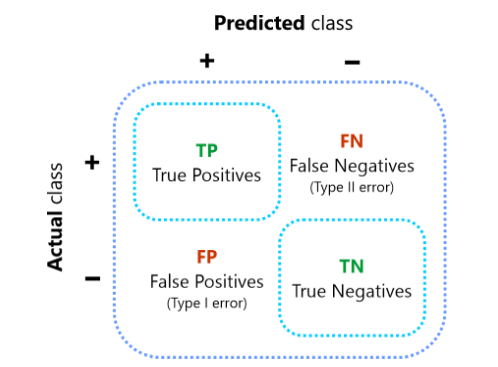  

**Precision (Точность)**
$$\large
Precision = \frac{TP}{TP+FP}
$$  
Точность показывает, какая доля объектов, выделенных классификатором как положительные, действительно является положительными. Высокая точность подразумевает, что очень мало отрицательных классов ошибочно классифицируются как положительные.
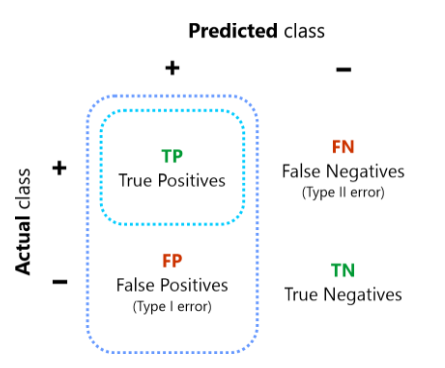  

**Recall (Полнота)**  
она же True Positive Rate (TPR).  
$$\large
Recall = \frac{TP}{TP+FN}
$$  
Показывает, какую долю положительных ответов смог правильно классифицировать наш алгоритм.  
Высокий Recall подразумевает, что очень мало положительных классов ошибочно классифицируются как отрицательные.  
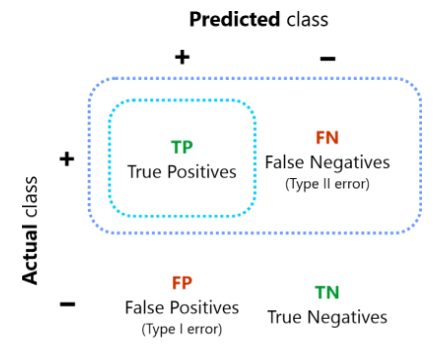  
*Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а Precision – способность отличать этот класс от других классов.*  

**F-мера**  
Метрика, которая одновременно отвечает за улучшение и Precision и Recall. В общем виде выглядит так:  
$$\large
F_β = (1+β^2) * \frac{Precision * Recall}{(β^2 * Precision) + Recall} 
$$
Коэфициент β в данном случае определяет вес точности (precision) в метрике. Т.е., изменяя β, вы можете регулировать, что для вас важнее: Precision или Recall.  
При β=1 у нас получится среднее гармоническое (в этом случае при precision = 1 и recall = 1 F-мера будет равна 1). А такая метрика называется F-один.  
$$\large
F_1 = 2 * \frac{Precision * Recall}{Precision + Recall} 
$$  

F1 ближе к меньшему из двух компонентов (Precision или Recall). F-мера достигает максимума, когда Precision и Recall равны единице, и близка к нулю, если один из этих аргументов близок к нулю.  
У F-меры есть и недостатки: как можно заметить, в расчете Precision и Recall вовсе не участвует True Negatives. В ситуации, когда есть правильно идентифицированные отрицательные классы, но нет правильно идентифицированных положительных классов, F-мера не будет информативной, поскольку будет возвращать 0. Следовательно, только F-меры недостаточно для определения эффективности модели.  

**ROC AUC**  
Все выше приведенные метрики при расчете оперируют только бинарными классами. А значит, ими можно манипулировать, изменяя порог отнесения объекта к тому или иному классу. Если выбрать порог большим, то классификатор будет относить к положительному классу меньше объектов, что приведет к увеличению точности и снижению полноты. По мере уменьшения порога точность будет падать, а полнота увеличиваться. Конкретное значение порога выбирается исходя из задачи.

Необходимость подбирать порог можно расценивать и как преимущество и как и недостаток. Но что если у вас нет возможности подобрать порог? Или вам нужно выбрать модель "среднюю по больнице". Как раз для таких случаев и существует метрика ROC AUC. ROC AUC позволяет оценивать качество модели классификации, не выбирая порог разбиения на классы, поскольку ей на вход подаются не классы, а вероятности.

ROC AUC это метрика качества, которая означает площадь под ROC-кривой. А если точнее:

ROC – Receiver Operating Characteristic (иногда называют «кривая ошибок»).
AUC – Area Under the Curve. Это площадь под ROC-кривой.
Может принимать значения от 0.0 до 1.0

ROC-кривая строится на двумерном графике единичной размерности, где по оси X выводится доля неверно принятых объектов (False Positive Rate, FPR), а Y - доля верно принятых объектов (True Positive Rate, TPR).  

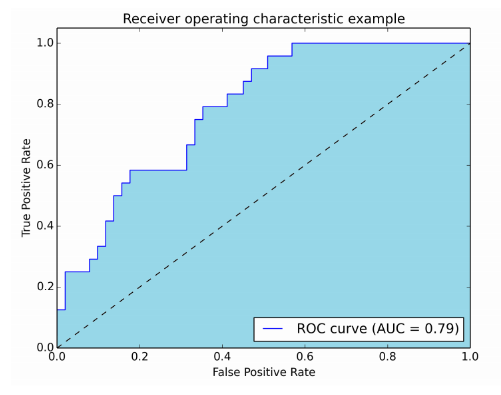  

При идеальной классификации ROC AUC = 1, и кривая проходит через точки (0,0), (0,1), (1,1).  

Критерий AUC ROC имеет большое число интерпретаций. Мне больше нравится такая:  
*UC ROC это вероятность того, что случайно выбранный положительный объект окажется выше случайно выбранного отрицательного объекта в отранжированном списке.*  

Недостатки ROC AUC. В целом, ROC AUC не чувствительна к несбалансированным классам. Но если положительный класс очень существенно меньше по размеру, то AUC ROC может давать неадекватную оценку качества работы алгоритма, поскольку измеряет долю неверно принятых объектов относительно общего числа отрицательных.  

Есть несколько способов построить и вычислить ROC AUC. Но нас интересует автоматический:  
$$\large
ROC AUC = \frac{1}{PN} * \sum_{i=1}^q{\sum_{j=1}^q{I[y_i < y_j]* I'[a_i < a_j]}}
$$  
где:  
* P - кол-во наблюдений положительного класса;  
* N - кол-во наблюдений отрицательного класса;  
* q - кол-во объектов;  
* y - метки классов;  
* a - предсказанные вероятности;
* $$
  I[y_i < y_j] = \left\{ \begin{array}{ll}
                    0, & \mbox{if $y_i \geq y_j$};\\
                    1, & \mbox{if $y_i < y_j$}.\end{array} \right.
  $$
* $$
  I'[a_i < a_j] = \left\{ \begin{array}{ll}
                        0 & \mbox{if $a_i > a_j$};\\ 
                        0.5 & \mbox{if $a_i = a_j$};\\ 
                        1 & \mbox{if $a_i < a_j$}.\end{array} \right.
  $$

С т.з. алгоритма вам нужно сделать следующее:  
1. Отсортировать полученные значения скоров от большего к меньшему.  
2. Пройтись по всем отсортированным значениям сверху вниз.  
3. Для каждого отрицательного класса:  
    * Посчитать, сколько положительных классов находятся выше текущего по скору.  
    * Посчитать, сколько положительных классов имеют такой же скор. Получившуюся сумму поделить на два.  
4. Просуммировать полученные значения и домножить на 1/PN.  
Примерно так:  
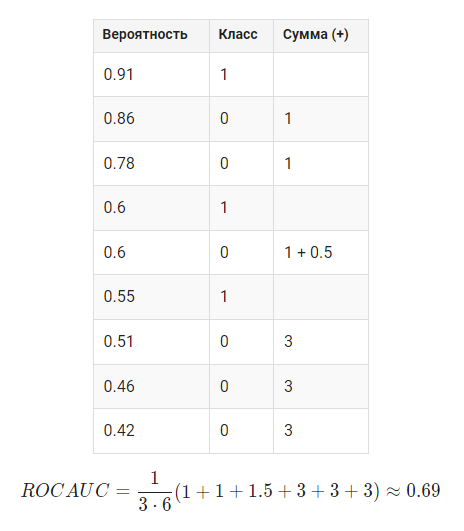

### Реализация  
Теперь реализуем метрики на практике:  

1. Добавьте в класс MyLogReg параметр metric, который будет принимать одно из следующих значений:  
    - accuracy
    - precision
    - recall
    - f1
    - roc_auc
    По умолчанию: None  
2. При обучении добавьте в вывод расчет метрики:  
    ```python
    start | loss: 42027.65 | <metric_name>: 234.65
    100 | loss: 1222.87 | <metric_name>: 114.35
    200 | loss: 232.17 | <metric_name>: 58.2
    300 | loss: 202.4 | <metric_name>: 46.01
    ```
    Если метрика не задана, то ничего дополнительно выводить не нужно.  
3. Добавьте метод get_best_score, который возвращает значение метрики уже обученной модели.  

*Примечание*  

*Метрика ROC AUC сильно зависит от порядка следования объектов. А разная последовательность арифметических операций может привести к тому, что скоры в последних знаках после запятой могут отличаться. Что, в свою очередь, приведет к разной сортировке объектов и разной оценке ROC AUC. Чтобы этого избежать, округлите скоры при вычислении метрики ROC AUC до 10 знака после запятой. При этом скоры, возвращаемые моделью, должны остаться в неизменном виде.*  

**Проверка**:  

**Входные данные**: названия всех метрик бинарной классификации;  
**Выходные данные**: последнее значение метрики (полученное после обучения модели).

In [51]:
class MyLogReg():
    
    def __init__(self, n_iter: int = 10, 
                 learning_rate: float = 0.1, 
                 metric: str = None):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric
        
        self.weights = None
        self.score = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # Предсказанное y = y^
            y_pred = X @ self.weights
            # Cигмоида (перевод значений в диапазон от 0 до 1) 
            y_prob = self._sigmoid(y_pred)
            
            # Градиент
            grad =  self._gradient(X, y, y_prob)
            # Шаг минимизации
            step = self.learning_rate 
            self.weights += (- self.learning_rate) * grad 
            
            # Функция потерь
            logloss = self._logloss(y, y_prob)  
                
            # Вывод логa, в котором указывается номер итерации и значение функций потери    
            if verbose and (iteration % verbose == 0) | (iteration == 1):
                if self.metric:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}| {self.metric}: {self._get_score(X, y)}|')
                else:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|')
                    
        self.score = self._get_score(X, y)
                    
    def _sigmoid(self, y_pred: np.ndarray):
        return 1 / (1 + np.exp(-y_pred))
         
    # Рассчет градиента
    def _gradient(self, X: np.ndarray, y: np.ndarray, y_prob: np.ndarray):
        return (1 / len(y)) * ((y_prob - y) @ X)
    
    # Рассчет функции потерь
    def _logloss(self, y: np.ndarray, y_prob: np.ndarray):
        return -(y * np.log(y_prob + self.eps) + (1 - y) * np.log(1 - y_prob + self.eps)).mean() 
    
    # Матрица ошибок
    def _confusion_matrix(self, y: np.ndarray, y_predict: np.ndarray):
        # [[TN, FP], 
        #  [FN, TP]]
        classes = np.unique(y)
        conf_matrix = np.zeros((len(classes), len(classes)))

        for i in range(len(classes)):
            for j in range(len(classes)):
                conf_matrix[i, j] = np.sum((y == classes[i]) & (y_predict == classes[j]))

        return conf_matrix
    
    # Рассчет Accuracy(доля правильных ответов)
    def _accuracy(self, y: np.ndarray, y_predict: np.ndarray):
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    
    # Рассчет Precision (Точность)
    def _precision(self, y: np.ndarray, y_predict: np.ndarray):
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
    
    # Рассчет Recall (Полнота)
    def _recall(self, y: np.ndarray, y_predict: np.ndarray):
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1]  + conf_matrix[1, 0]))
    
    # Рассчет F1-меры
    def _f1(self, y: np.ndarray, y_predict: np.ndarray):
        conf_matrix = self._confusion_matrix(y, y_predict)
        prec = self._precision(y, y_predict)
        rec = self._recall(y, y_predict)
        return (2 * (prec * rec) / (prec + rec)) 
    
    # Рассчет ROC AUC
    def _roc_auc(self, y: np.ndarray, y_predict: np.ndarray):
        df = pd.DataFrame({'y_proba': y_predict, 'y_true': y}).sort_values(by = 'y_proba', ascending=False)
    
        p = df[df['y_true'] == 1]
        n = df[df['y_true'] == 0]
    
        total = 0
        for prob in n['y_proba']:
            positive_score = (p['y_proba'] > prob).sum()
            same_score = (p['y_proba'] == prob).sum()
            total += positive_score + 0.5 * same_score
        
        return (1 / (p.shape[0] * n.shape[0]) * total) 
    
    def _get_score(self, X, y):
        if self.metric == None:
            self.score = 'The model metric is not specified. Supported metrics: accuracy, precision, recall, f1, roc_auc'
        elif self.metric in ('accuracy', 'precision', 'recall', 'f1'):
            self.score = getattr(self, '_' + self.metric)(y, np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0))
            return self.score
        elif self.metric == 'roc_auc':
            self.score = getattr(self, '_' + self.metric)(y, self._sigmoid(X @ self.weights))
            return self.score
        else:
            raise ValueError('Invalid metric. Supported metrics: accuracy, precision, recall, f1, roc_auc')

    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора единиц)
    def get_coef(self):
        return self.weights[1:]
 
    # Предсказание вероятности соотнесения к классу
    def predict_proba(self, X: pd.DataFrame):  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1) 
        return (1 / (1 + np.exp(-X @ self.weights)))
        
    # Перевод вероятностей в бинарные классы
    def predict(self, X: pd.DataFrame):  
        return np.where(self.predict_proba(X) > 0.5, 1, 0)
    
    # Возвращает последнее значение метрики 
    def get_best_score(self):
        return self.score
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
        
    def __str__(self):
        return self.__repr__()     

In [52]:
a = MyLogReg(50, 0.1, 'roc_auc')
a

MyLogReg class: n_iter=50, learning_rate=0.1, metric=roc_auc, weights=None, score=None, eps=1e-15

In [53]:
a.fit(X,y, verbose=10 )

1| LogLoss: 3.67| roc_auc: 0.5383301533206133|
10| LogLoss: 1.87| roc_auc: 0.6219904879619519|
20| LogLoss: 1.16| roc_auc: 0.729254917019668|
30| LogLoss: 0.83| roc_auc: 0.8050832203328814|
40| LogLoss: 0.65| roc_auc: 0.8475193900775604|
50| LogLoss: 0.56| roc_auc: 0.8720714882859532|


In [54]:
a.get_best_score()

0.8720714882859532

In [55]:
print(round(a.get_best_score(),10))

0.8720714883


### 2.2.5 Регуляризация<a id='2.2.5'></a>

Теперь повторим регуляризацию для логистической регрессии. Она ничем не отличается от линейной - просто добавляем веса к функции потерь:  

**L1 регуляризация (или Lasso регрессия)**  
Добавляем модуль суммы весов к функции потерь:  
$$\large
LassoLogLoss = - \frac{1}{n} \sum_{i=1}^n{(y_i \log{(\hat y_i)} + 
                                          (1 - y_i) \log(1 - \hat y_i)) + 
                                          \lambda_1\ \sum_{j=1}^m{|w_j|}}
$$  

Градиент:  
$$\large
\nabla\ (LassoLogLoss) = \begin{pmatrix} \theta_0\ \\ \theta_1\ \\ \vdots \\ \theta_m\ \end{pmatrix} 
+ \lambda_1\ 
\begin{pmatrix} sgn(w_0) \\ sgn(w_1) \\ \vdots \\ sgn(w_m)  \end{pmatrix} 
$$  

или в виде матричного перемножения:  
$$\large
\nabla\ (LassoLogLoss) = \frac{1}{n}(\hat Y - Y)X + \lambda_1\ sgn(W)
$$  


**L2 регуляризация (или Ridge регрессия)**  
Добавляем квадрат весов к функции потерь:  
$$\large
RidgeLogLoss = - \frac{1}{n} \sum_{i=1}^n{(y_i \log{(\hat y_i)} + 
                                          (1 - y_i) \log(1 - \hat y_i)) + 
                                          \lambda_2\ \sum_{j=1}^m{w_j^2}}
$$  

Градиент:  
$$\large
\nabla\ (RidgeLogLoss) = \frac{1}{n}(\hat Y - Y)X + \lambda_2\ 2W
$$  

**ElasticNet**  
Добавляем и квадрат и модуль весов:  
$$\large
ElasticNetLogLoss = - \frac{1}{n} \sum_{i=1}^n{(y_i \log{(\hat y_i)} + 
                                          (1 - y_i) \log(1 - \hat y_i)) + 
                                          \lambda_1\ \sum_{j=1}^m{|w_j|} +
                                          \lambda_2\ \sum_{j=1}^m{w_j^2}}
$$   

Градиент:  
$$\large
\nabla\ (ElasticNetLogLoss) = \frac{1}{n}(\hat Y - Y)X + \lambda_1\ sgn(W) + \lambda_2\ 2W
$$  

### Реализация  
**Проверка**  

**Входные данные**: три вида регуляризации и одна модель без регуляризации;  
**Выходные данные**: коэффициенты обученной логистической регрессии (их сумма).

In [56]:
class MyLogReg():
    
    def __init__(self, 
                 n_iter: int = 10, 
                 learning_rate: float = 0.1, 
                 metric: str = None,
                 reg: str = None,
                 l1_coef: float = 0, 
                 l2_coef: float = 0 ):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric # 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
        self.reg = reg # 'l1', 'l2', 'elasticnet'.
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        
        self.weights = None
        self.score = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # Предсказанное y = y^
            y_pred = X @ self.weights
            # Cигмоида (перевод значений в диапазон от 0 до 1) 
            y_prob = self._sigmoid(y_pred)
            
            # Градиент
            grad =  self._gradient(X, y, y_prob)
            
            # Шаг минимизации
            step = self.learning_rate 
            self.weights += (- self.learning_rate) * grad 
            
            # Функция потерь
            logloss = self._logloss(y, y_prob)  
                
            # Вывод логa, в котором указывается номер итерации и значение функций потери    
            if verbose and (iteration % verbose == 0) | (iteration == 1):
                if self.metric:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}| {self.metric}: {self._get_score(X, y)}|')
                else:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|')
                    
        self.score = self._get_score(X, y)
    
    # Рассчет вероятности соотнесения к классу (в диапазоне от 0 до 1)
    def _sigmoid(self, y_pred: np.ndarray) -> pd.Series:
        return 1 / (1 + np.exp(-y_pred))
         
    # Рассчет градиента
    def _gradient(self, X: np.ndarray, y: np.ndarray, y_prob: np.ndarray) -> pd.Series:
        grad = (1 / len(y)) * ((y_prob - y) @ X)
        # Без регуляризации
        if self.reg == None:
            return grad
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            return grad +  l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет функции потерь
    def _logloss(self, y: np.ndarray, y_prob: np.ndarray) -> float:
        logloss = -(y * np.log(y_prob + self.eps) + (1 - y) * np.log(1 - y_prob + self.eps)).mean() 
        # Без регуляризации
        if self.reg == None:
            return logloss
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            return logloss + l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Матрица ошибок
    def _confusion_matrix(self, y: np.ndarray, y_predict: np.ndarray) -> np.ndarray:
        # [[TN, FP], 
        #  [FN, TP]]
        classes = np.unique(y)
        conf_matrix = np.zeros((len(classes), len(classes)))

        for i in range(len(classes)):
            for j in range(len(classes)):
                conf_matrix[i, j] = np.sum((y == classes[i]) & (y_predict == classes[j]))

        return conf_matrix
    
    # Рассчет Accuracy(доля правильных ответов)
    def _accuracy(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    
    # Рассчет Precision (Точность)
    def _precision(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
    
    # Рассчет Recall (Полнота)
    def _recall(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1]  + conf_matrix[1, 0]))
    
    # Рассчет F1-меры
    def _f1(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        prec = self._precision(y, y_predict)
        rec = self._recall(y, y_predict)
        return (2 * (prec * rec) / (prec + rec)) 
    
    # Рассчет ROC AUC
    def _roc_auc(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        df = pd.DataFrame({'y_proba': y_predict, 'y_true': y}).sort_values(by = 'y_proba', ascending=False)
    
        p = df[df['y_true'] == 1]
        n = df[df['y_true'] == 0]
    
        total = 0
        for prob in n['y_proba']:
            positive_score = (p['y_proba'] > prob).sum()
            same_score = (p['y_proba'] == prob).sum()
            total += positive_score + 0.5 * same_score
        
        return (1 / (p.shape[0] * n.shape[0]) * total) 
    
    def _get_score(self, X: pd.DataFrame, y: np.ndarray) -> float:
        if self.metric == None:
            self.score = 'The model metric is not specified. Supported metrics: accuracy, precision, recall, f1, roc_auc'
        elif self.metric in ('accuracy', 'precision', 'recall', 'f1'):
            self.score = getattr(self, '_' + self.metric)(y, np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0))
            return self.score
        elif self.metric == 'roc_auc':
            self.score = getattr(self, '_' + self.metric)(y, self._sigmoid(X @ self.weights))
            return self.score
        else:
            raise ValueError('Invalid metric. Supported metrics: accuracy, precision, recall, f1, roc_auc')

    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора единиц)
    def get_coef(self) -> pd.Series:
        return self.weights[1:]
    
    # Возвращает последнее значение метрики 
    def get_best_score(self) -> float:
        return self.score
 
    # Предсказание вероятности соотнесения к классу
    def predict_proba(self, X: pd.DataFrame) -> pd.Series:  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1) 
        return (1 / (1 + np.exp(-X @ self.weights)))
        
    # Перевод вероятностей в бинарные классы
    def predict(self, X: pd.DataFrame) -> np.ndarray:  
        return np.where(self.predict_proba(X) > 0.5, 1, 0)
    

    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
        
    def __str__(self):
        return self.__repr__()     

In [57]:
a = MyLogReg(50, 0.1, 'roc_auc', 'elasticnet' , 0.1, 0.1)
a

MyLogReg class: n_iter=50, learning_rate=0.1, metric=roc_auc, reg=elasticnet, l1_coef=0.1, l2_coef=0.1, weights=None, score=None, eps=1e-15

In [58]:
a.fit(X,y, verbose=10 )

1| LogLoss: 6.44| roc_auc: 0.5385701542806172|
10| LogLoss: 2.61| roc_auc: 0.6532546130184521|
20| LogLoss: 1.21| roc_auc: 0.8074632298529194|
30| LogLoss: 0.75| roc_auc: 0.8874595498381994|
40| LogLoss: 0.63| roc_auc: 0.9112956451825808|
50| LogLoss: 0.6| roc_auc: 0.9098996395985585|


In [59]:
a.get_best_score()

0.9098996395985585

### 2.2.6 Скорость обучения<a id='2.2.6'></a>

Добавим оптимальный регулятор скорости обучения.  

Возьмите код из предыдущего шага и модифицируйте в нем параметр learning_rate так, чтобы он принимал и число и лямбда-функцию: 

* Если на вход пришло число, то работаем, как и раньше.  
* Если на вход пришла lambda-функция, то вычисляем learning_rate на основе переданной формулы. Примерно такой:  
    ```python
    lambda iter: 0.5 * (0.85 ** iter)
    ```  
    
**Проверка**:

**Входные данные**: три различных значения для скорости обучения, два из которых — динамические;  
**Выходные данные**: коэффициенты обученной логистической регрессии (их сумма).  

In [60]:
class MyLogReg():
    
    def __init__(self, 
                 n_iter: int = 10, 
                 learning_rate: float = 0.1, 
                 metric: str = None,
                 reg: str = None,
                 l1_coef: float = 0, 
                 l2_coef: float = 0 ):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric # 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
        self.reg = reg # 'l1', 'l2', 'elasticnet'.
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        
        self.weights = None
        self.score = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # Предсказанное y = y^
            y_pred = X @ self.weights
            # Cигмоида (перевод значений в диапазон от 0 до 1) 
            y_prob = self._sigmoid(y_pred)
            
            # Градиент
            grad =  self._gradient(X, y, y_prob)
            
            # Шаг минимизации (может быть динамически изменяемым)
            step = self.learning_rate if type(self.learning_rate) in (int, float) else self.learning_rate(iteration) 
            self.weights += -step * grad 
            
            # Функция потерь
            logloss = self._logloss(y, y_prob)  
                
            # Вывод логa, в котором указывается номер итерации и значение функций потери    
            if verbose and (iteration % verbose == 0) | (iteration == 1):
                if self.metric:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}| {self.metric}: {self._get_score(X, y)}|step: {np.round(step, 3)}')
                else:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|step: {step}')
                    
        self.score = self._get_score(X, y)
    
    # Рассчет вероятности соотнесения к классу (в диапазоне от 0 до 1)
    def _sigmoid(self, y_pred: np.ndarray) -> pd.Series:
        return 1 / (1 + np.exp(-y_pred))
         
    # Рассчет градиента
    def _gradient(self, X: np.ndarray, y: np.ndarray, y_prob: np.ndarray) -> pd.Series:
        grad = (1 / len(y)) * ((y_prob - y) @ X)
        # Без регуляризации
        if self.reg == None:
            return grad
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            return grad +  l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет функции потерь
    def _logloss(self, y: np.ndarray, y_prob: np.ndarray) -> float:
        logloss = -(y * np.log(y_prob + self.eps) + (1 - y) * np.log(1 - y_prob + self.eps)).mean() 
        # Без регуляризации
        if self.reg == None:
            return logloss
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            return logloss + l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Матрица ошибок
    def _confusion_matrix(self, y: np.ndarray, y_predict: np.ndarray) -> np.ndarray:
        # [[TN, FP], 
        #  [FN, TP]]
        classes = np.unique(y)
        conf_matrix = np.zeros((len(classes), len(classes)))

        for i in range(len(classes)):
            for j in range(len(classes)):
                conf_matrix[i, j] = np.sum((y == classes[i]) & (y_predict == classes[j]))

        return conf_matrix
    
    # Рассчет Accuracy(доля правильных ответов)
    def _accuracy(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    
    # Рассчет Precision (Точность)
    def _precision(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
    
    # Рассчет Recall (Полнота)
    def _recall(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1]  + conf_matrix[1, 0]))
    
    # Рассчет F1-меры
    def _f1(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        prec = self._precision(y, y_predict)
        rec = self._recall(y, y_predict)
        return (2 * (prec * rec) / (prec + rec)) 
    
    # Рассчет ROC AUC
    def _roc_auc(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        df = pd.DataFrame({'y_proba': y_predict, 'y_true': y}).sort_values(by = 'y_proba', ascending=False)
    
        p = df[df['y_true'] == 1]
        n = df[df['y_true'] == 0]
    
        total = 0
        for prob in n['y_proba']:
            positive_score = (p['y_proba'] > prob).sum()
            same_score = (p['y_proba'] == prob).sum()
            total += positive_score + 0.5 * same_score
        
        return (1 / (p.shape[0] * n.shape[0]) * total) 
    
    def _get_score(self, X: pd.DataFrame, y: np.ndarray) -> float:
        if self.metric == None:
            self.score = 'The model metric is not specified. Supported metrics: accuracy, precision, recall, f1, roc_auc'
        elif self.metric in ('accuracy', 'precision', 'recall', 'f1'):
            self.score = getattr(self, '_' + self.metric)(y, np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0))
            return self.score
        elif self.metric == 'roc_auc':
            self.score = getattr(self, '_' + self.metric)(y, self._sigmoid(X @ self.weights))
            return self.score
        else:
            raise ValueError('Invalid metric. Supported metrics: accuracy, precision, recall, f1, roc_auc')

    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора единиц)
    def get_coef(self) -> pd.Series:
        return self.weights[1:]
    
    # Возвращает последнее значение метрики 
    def get_best_score(self) -> float:
        return self.score
 
    # Предсказание вероятности соотнесения к классу
    def predict_proba(self, X: pd.DataFrame) -> pd.Series:  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1) 
        return (1 / (1 + np.exp(-X @ self.weights)))
        
    # Перевод вероятностей в бинарные классы
    def predict(self, X: pd.DataFrame) -> np.ndarray:  
        return np.where(self.predict_proba(X) > 0.5, 1, 0)
    

    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
        
    def __str__(self):
        return self.__repr__()   

In [61]:
a = MyLogReg(50, lambda iter: 0.5 * (0.85 ** iter), 'roc_auc', 'elasticnet' , 0.1, 0.1)
a

MyLogReg class: n_iter=50, learning_rate=<function <lambda> at 0x000001944424FF40>, metric=roc_auc, reg=elasticnet, l1_coef=0.1, l2_coef=0.1, weights=None, score=None, eps=1e-15

In [62]:
a.fit(X, y, verbose = 5)

1| LogLoss: 5.76| roc_auc: 0.5695302781211125|step: 0.425
5| LogLoss: 1.66| roc_auc: 0.7611710446841787|step: 0.222
10| LogLoss: 1.01| roc_auc: 0.8440673762695051|step: 0.098
15| LogLoss: 0.86| roc_auc: 0.8678234712938852|step: 0.044
20| LogLoss: 0.81| roc_auc: 0.8768595074380298|step: 0.019
25| LogLoss: 0.79| roc_auc: 0.8797955191820768|step: 0.009
30| LogLoss: 0.78| roc_auc: 0.8809755239020957|step: 0.004
35| LogLoss: 0.78| roc_auc: 0.8814915259661039|step: 0.002
40| LogLoss: 0.78| roc_auc: 0.8817715270861084|step: 0.001
45| LogLoss: 0.78| roc_auc: 0.8818875275501102|step: 0.0
50| LogLoss: 0.78| roc_auc: 0.8819315277261109|step: 0.0


In [63]:
b = MyLogReg(50, 0.03, 'roc_auc', 'elasticnet' , 0.1, 0.1)
b

MyLogReg class: n_iter=50, learning_rate=0.03, metric=roc_auc, reg=elasticnet, l1_coef=0.1, l2_coef=0.1, weights=None, score=None, eps=1e-15

In [64]:
b.fit(X, y, verbose = 5)

1| LogLoss: 6.6| roc_auc: 0.5344461377845512|step: 0.03
5| LogLoss: 5.88| roc_auc: 0.54187816751267|step: 0.03
10| LogLoss: 5.07| roc_auc: 0.5541502166008664|step: 0.03
15| LogLoss: 4.36| roc_auc: 0.568994275977104|step: 0.03
20| LogLoss: 3.74| roc_auc: 0.5871663486653946|step: 0.03
25| LogLoss: 3.22| roc_auc: 0.6083384333537334|step: 0.03
30| LogLoss: 2.79| roc_auc: 0.6330385321541286|step: 0.03
35| LogLoss: 2.43| roc_auc: 0.6592946371785487|step: 0.03
40| LogLoss: 2.13| roc_auc: 0.6874027496109985|step: 0.03
45| LogLoss: 1.9| roc_auc: 0.7114748458993836|step: 0.03
50| LogLoss: 1.69| roc_auc: 0.7356629426517707|step: 0.03


### 2.2.7 Стохастический градиентный спуск<a id='2.2.7'></a>

И последнее... научимся выполнять стохастический градиентный спуск. Для этого добавьте в класс MyLineReg два новых параметра:  

* sgd_sample — кол-во образцов, которое будет использоваться на каждой итерации обучения. Может принимать либо целые числа, либо дробные от 0.0 до 1.0. По-умолчанию: None.  
* random_state — для воспроизводимости результата зафиксируем сид (об этом далее). По-умолчанию: 42.  

Внесем изменение в алгоритм обучения:  

* В начале обучения фискируем сид (см. ниже).    
* В начале каждого шага формируется новый мини-пакет на основе параметра sgd_sample:  
    * Если заданы целые числа, то из исходного датасета берется ровно столько примеров, сколько указано.  
    * Если задано дробное число, то рассматриваем его как долю от количества строк в исходном датасете (округленное до целого числа).  
* Расчет градиента (и последующее изменение весов) делаем на основе мини-пакета.  
* Все остальные параметры, если они заданы (например, регуляризация), также должны учитываться при обучении.  
* Ошибку и метрику необходимо считать на всем датасете, а не на мини-пакете.  
* Если sgd_sample = None, то обучение выполняется как раньше (на всех данных).  

**Случайная генерация**  

Случайные подвыборки будем генерировать, как и раньше.  
В начале обучения посредством модуля random фиксируем сид:  
```python
random.seed(<random_state>)  
```  
В начале каждой итерации сформируем номера строк, которые стоит отобрать.  
```python
sample_rows_idx = random.sample(range(X.shape[0]), <sgd_sample>)
```
З.Ы. Модуль random уже импортирован.  

**Тестирование**:  

**Входные данные**: различные значения параметра sgd_sample;  
**Выходные данные**: коэффициенты обученной логистической регрессии (их среднее).

In [65]:
import random

In [66]:
class MyLogReg():
    
    def __init__(self, 
                 n_iter: int = 10, 
                 learning_rate: float = 0.1, 
                 metric: str = None,
                 reg: str = None,
                 l1_coef: float = 0, 
                 l2_coef: float = 0,
                 sgd_sample: [int, float] = None,
                 random_state: int = 42):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric # 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
        self.reg = reg # 'l1', 'l2', 'elasticnet'.
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.sgd_sample = sgd_sample
        self.random_state = random_state
        
        self.weights = None
        self.score = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False):    
        # Фиксируется сид для разделения данных на батчи
        random.seed(self.random_state)
        
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # В начале каждого шага формируется новый мини-пакет, состоящий из случайно выбранных элементов
            X_batch, y_batch = self._get_batches(X, y, self.sgd_sample)
            
            # Предсказанное y = y^
            y_pred = X_batch @ self.weights
            # Cигмоида (перевод значений в диапазон от 0 до 1) 
            y_prob = self._sigmoid(y_pred)
            
            # Градиент
            grad =  self._gradient(X_batch, y_batch, y_prob)
            
            # Шаг минимизации (может быть динамически изменяемым)
            step = self.learning_rate if type(self.learning_rate) in (int, float) else self.learning_rate(iteration) 
            self.weights += -step * grad 
            
            # Функция потерь
            y_prob_full = self._sigmoid(X @ self.weights)
            logloss = self._logloss(y, y_prob_full)  
                
            # Вывод логa, в котором указывается номер итерации и значение функций потери    
            if verbose and (iteration % verbose == 0) | (iteration == 1):
                if self.metric:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|' , end = '')
                    print(f'{self.metric}: {np.round(self._get_score(X, y), 3)}|step: {np.round(step, 3)}')
                else:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|step: {step}')
                    
        self.score = self._get_score(X, y)
        
        
    # Подготовка батчей(мини-пакетов данных) для стохастического градиентного спуска
    def _get_batches(self, X: np.ndarray, y: np.ndarray, sgd: [int, float, None]) -> np.ndarray:
        # Если sgd - float, то берется доля от общего количества строк
        if isinstance(sgd, float):
            sample_rows_idx = random.sample(range(X.shape[0]), round(X.shape[0] * sgd))
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        # Если sgd - int, то берется ровно столько строк, сколько указано
        elif isinstance(sgd, int):
            sample_rows_idx = random.sample(range(X.shape[0]), sgd)
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        else:
        # В других случаях выборка не меняется
            X_batch, y_batch = X, y
        return X_batch, y_batch    
    
    # Рассчет вероятности соотнесения к классу (в диапазоне от 0 до 1)
    def _sigmoid(self, y_pred: np.ndarray) -> pd.Series:
        return 1 / (1 + np.exp(-y_pred))
         
    # Рассчет градиента
    def _gradient(self, X: np.ndarray, y: np.ndarray, y_prob: np.ndarray) -> pd.Series:
        grad = (1 / len(y)) * ((y_prob - y) @ X)
        # Без регуляризации
        if self.reg == None:
            return grad
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            return grad +  l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет функции потерь
    def _logloss(self, y: np.ndarray, y_prob: np.ndarray) -> float:
        logloss = -(y * np.log(y_prob + self.eps) + (1 - y) * np.log(1 - y_prob + self.eps)).mean() 
        # Без регуляризации
        if self.reg == None:
            return logloss
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            return logloss + l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Матрица ошибок
    def _confusion_matrix(self, y: np.ndarray, y_predict: np.ndarray) -> np.ndarray:
        # [[TN, FP], 
        #  [FN, TP]]
        classes = np.unique(y)
        conf_matrix = np.zeros((len(classes), len(classes)))

        for i in range(len(classes)):
            for j in range(len(classes)):
                conf_matrix[i, j] = np.sum((y == classes[i]) & (y_predict == classes[j]))

        return conf_matrix
    
    # Рассчет Accuracy(доля правильных ответов)
    def _accuracy(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    
    # Рассчет Precision (Точность)
    def _precision(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
    
    # Рассчет Recall (Полнота)
    def _recall(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        return (conf_matrix[1, 1] / (conf_matrix[1, 1]  + conf_matrix[1, 0]))
    
    # Рассчет F1-меры
    def _f1(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        conf_matrix = self._confusion_matrix(y, y_predict)
        prec = self._precision(y, y_predict)
        rec = self._recall(y, y_predict)
        return (2 * (prec * rec) / (prec + rec)) 
    
    # Рассчет ROC AUC
    def _roc_auc(self, y: np.ndarray, y_predict: np.ndarray) -> float:
        df = pd.DataFrame({'y_proba': y_predict, 'y_true': y}).sort_values(by = 'y_proba', ascending=False)
    
        p = df[df['y_true'] == 1]
        n = df[df['y_true'] == 0]
    
        total = 0
        for prob in n['y_proba']:
            positive_score = (p['y_proba'] > prob).sum()
            same_score = (p['y_proba'] == prob).sum()
            total += positive_score + 0.5 * same_score
        
        return (1 / (p.shape[0] * n.shape[0]) * total) 
    
    def _get_score(self, X: pd.DataFrame, y: np.ndarray) -> float:
        if self.metric == None:
            self.score = 'The model metric is not specified. Supported metrics: accuracy, precision, recall, f1, roc_auc'
        elif self.metric in ('accuracy', 'precision', 'recall', 'f1'):
            self.score = getattr(self, '_' + self.metric)(y, np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0))
            return self.score
        elif self.metric == 'roc_auc':
            self.score = getattr(self, '_' + self.metric)(y, self._sigmoid(X @ self.weights))
            return self.score
        else:
            raise ValueError('Invalid metric. Supported metrics: accuracy, precision, recall, f1, roc_auc')

    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора единиц)
    def get_coef(self) -> pd.Series:
        return self.weights[1:]
    
    # Возвращает последнее значение метрики 
    def get_best_score(self) -> float:
        return self.score
 
    # Предсказание вероятности соотнесения к классу
    def predict_proba(self, X: pd.DataFrame) -> pd.Series:  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1) 
        return (1 / (1 + np.exp(-X @ self.weights)))
        
    # Перевод вероятностей в бинарные классы
    def predict(self, X: pd.DataFrame) -> np.ndarray:  
        return np.where(self.predict_proba(X) > 0.5, 1, 0)
    

    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
        
    def __str__(self):
        return self.__repr__()   

### Финальные версии моделей<a id='fin'></a>

In [67]:
import pandas as pd
import numpy as np

import random

### Линейная

In [68]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=14, n_informative=10, noise=15, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]

In [69]:
class MyLineReg():
    
    def __init__(self, 
                 n_iter: int = 100, 
                 learning_rate: [int, float] = 0.1, 
                 metric: str = None, 
                 reg: str = None, 
                 l1_coef: float = 0, 
                 l2_coef: float = 0,
                 sgd_sample: [int, float] = None, 
                 random_state: int = 42):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric
        self.weights = None
        self.reg = reg
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.sgd_sample = sgd_sample
        self. random_state = random_state
    
    def __str__(self):
        return self.__repr__()
    
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLineReg class: ' + ', '.join(params)
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False) -> None:    
         # Фиксируется сид для разделения данных на батчи
        random.seed(self.random_state)
        
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1): 
            # В начале каждого шага формируется новый мини-пакет, состоящий из случайно выбранных элементов
            X_batch, y_batch = self._get_batches(X, y, self.sgd_sample)
            
            # Предсказанное y = y^
            y_pred = X_batch @ self.weights
            grad = self._gradient(y_pred, y_batch, X_batch)
            
            # Шаг минимизации может быть динамически изменяемым
            step = self.learning_rate if type(self.learning_rate) in (int, float) else self.learning_rate(iteration) 
            self.weights += (- step) * grad 
            
            # Ошибка и метрика считаются на всем датасете
            y_pred_full = X @ self.weights
            loss = (y_pred_full - y).pow(2).mean() + self._loss_reg(y_pred_full, y)
            self.score = self._loss_metric(y_pred_full, y) + self._loss_reg(y_pred_full, y)
            # Вывод логa, в котором указывается номер итерации и значение функций потери 
            if verbose and (iteration == 1) | (iteration % verbose == 0):
                if self.metric and (self.metric!= 'mse'):
                    print(f'{iteration}| {self.metric}: {np.round(self.score,2)}| step: {np.round(step,5)} |')
                else:
                    print(f'{iteration}| mse: {np.round(self.score,2)}| step: {np.round(step,5)} |')
                    
                    
    # Подготовка батчей(пакетов) для стохастического градиентного спуска
    def _get_batches(self, X: np.ndarray, y: np.ndarray, sgd: [int, float, None]) -> np.ndarray:
        # Если sgd - float, то берется доля от общего количества строк
        if isinstance(sgd, float):
            sample_rows_idx = random.sample(range(X.shape[0]), round(X.shape[0] * sgd))
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        # Если sgd - int, то берется ровно столько строк, сколько указано
        elif isinstance(sgd, int):
            sample_rows_idx = random.sample(range(X.shape[0]), sgd)
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        else:
        # В других случаях выборка не меняется
            X_batch, y_batch = X, y
        return X_batch, y_batch
    
    # Рассчет градиента
    def _gradient(self, y_pred: np.ndarray, y: np.ndarray, X: np.ndarray) -> float:
        grad =  (2 / len(y)) * ((y_pred - y) @ X)
        # Без регуляризации
        if self.reg == None:
            return grad
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            return grad + l1_reg
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            l2_reg = self.l2_coef * 2 * self.weights
            return grad + l2_reg
         # ElasticNet
        elif self.reg == 'elasticnet':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            l2_reg = self.l2_coef * 2 * self.weights
            return grad + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет функции потерь
    def _loss_metric(self, y_pred: np.ndarray, y: np.ndarray) -> float:
        # Cреднеквадратичная ошибка
        if (self.metric == None) | (self.metric == 'mse'):
            return (y - y_pred).pow(2).mean()
        elif self.metric == 'rmse':
            return np.sqrt((y - y_pred).pow(2).mean())
        # Средняя абсолютная ошибка
        elif self.metric == 'mae':
            return (y - y_pred).abs().mean()
        # Cредняя абсолютная ошибка в процентах
        elif self.metric == 'mape':
            return 100 * ((y - y_pred) / y).abs().mean()
        # Коэффициент детерминации
        elif self.metric == 'r2':
            return 1 - (y - y_pred).pow(2).sum() / ((y - y.mean()).pow(2).sum())
        raise ValueError('Invalid metric. Supported metrics: mae, mse, rmse, mape, r2')
        
    # Рассчет регуляризации
    def  _loss_reg(self, y_pred: np.ndarray, y: np.ndarray) -> float:
        # Без регуляризации
        if self.reg == None:
            return 0
        # L1 регуляризация (или Lasso регрессия)
        elif self.reg == 'l1':
            return self.l1_coef * abs(self.weights).sum()
        # L2 регуляризация (или Ridge регрессия)
        elif self.reg == 'l2':
            return self.l2_coef * (self.weights**2).sum()
        # ElasticNet
        elif self.reg == 'elasticnet':
            return (self.l1_coef * abs(self.weights).sum()) + (self.l2_coef * (self.weights**2).sum())
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')

    # Предсказание
    def predict(self, X: pd.DataFrame) -> np.ndarray:  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1)
        return X @ self.weights
    
    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора W)
    def get_coef(self) -> np.ndarray:
        return self.weights[1:]
        
    # Возвращает последнее значение метрики
    def get_best_score(self) -> float:
        return self.score

### Логистическая

In [70]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=14, n_informative=10, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]

In [71]:
class MyLogReg():
    
    def __init__(self, 
                 n_iter: int = 10, 
                 learning_rate: float = 0.1, 
                 metric: str = None,
                 reg: str = None,
                 l1_coef: float = 0, 
                 l2_coef: float = 0,
                 sgd_sample: [int, float] = None,
                 random_state: int = 42):
        
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.metric = metric # 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'.
        self.reg = reg # 'l1', 'l2', 'elasticnet'.
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.sgd_sample = sgd_sample
        self.random_state = random_state
        
        self.weights = None
        self.score = None
        self.eps = 1e-15 # очень малое число для избежания ошибки деления на 0
        
        
    def __repr__(self):
        params = [f'{key}={value}' for key, value in self.__dict__.items()]
        return 'MyLogReg class: ' + ', '.join(params)
        
    def __str__(self):
        return self.__repr__()   
    
    
    # Обучение
    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: int = False) -> None:    
        # Фиксируется сид для разделения данных на батчи
        random.seed(self.random_state)
        
        X = X.copy()
        y = y.copy()
        X.insert(loc = 0, column = 'w0', value = 1)  
        self.weights = np.ones(X.shape[1])
        
        for iteration in range(1, self.n_iter + 1):        
            # В начале каждого шага формируется новый мини-пакет, состоящий из случайно выбранных элементов
            X_batch, y_batch = self._get_batches(X, y, self.sgd_sample)
            
            # Предсказанное y = y^
            y_pred = X_batch @ self.weights
            # Cигмоида (перевод значений в диапазон от 0 до 1) 
            y_prob = self._sigmoid(y_pred)
            
            # Градиент
            grad =  self._gradient(X_batch, y_batch, y_prob)
            
            # Шаг минимизации (может быть динамически изменяемым)
            step = self.learning_rate if type(self.learning_rate) in (int, float) else self.learning_rate(iteration) 
            self.weights += -step * grad 
            
            # Функция потерь
            y_prob_full = self._sigmoid(X @ self.weights)
            logloss = self._logloss(y, y_prob_full)  
                
            # Вывод логa, в котором указывается номер итерации и значение функций потери    
            if verbose and (iteration % verbose == 0) | (iteration == 1):
                if self.metric:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|' , end = '')
                    print(f'{self.metric}: {np.round(self._get_score(X, y), 3)}|step: {np.round(step, 3)}')
                else:
                    print(f'{iteration}| LogLoss: {np.round(logloss,2)}|step: {step}')
                    
        self.score = self._get_score(X, y)
        
        
    # Подготовка батчей(мини-пакетов данных) для стохастического градиентного спуска
    def _get_batches(self, X: np.ndarray, y: np.ndarray, sgd: [int, float, None]) -> np.ndarray:
        # Если sgd - float, то берется доля от общего количества строк
        if isinstance(sgd, float):
            sample_rows_idx = random.sample(range(X.shape[0]), round(X.shape[0] * sgd))
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        # Если sgd - int, то берется ровно столько строк, сколько указано
        elif isinstance(sgd, int):
            sample_rows_idx = random.sample(range(X.shape[0]), sgd)
            X_batch, y_batch = X.values[sample_rows_idx ], y.values[sample_rows_idx]
        else:
        # В других случаях выборка не меняется
            X_batch, y_batch = X, y
        return X_batch, y_batch    
    
    # Рассчет вероятности соотнесения к классу (в диапазоне от 0 до 1)
    def _sigmoid(self, y_pred: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-y_pred))
         
    # Рассчет градиента
    def _gradient(self, X: np.ndarray, y: np.ndarray, y_prob: np.ndarray) -> np.ndarray:
        grad = (1 / len(y)) * ((y_prob - y) @ X)
        # Без регуляризации
        if self.reg == None:
            return grad
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            return grad +  l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = np.select([self.weights > 0, self.weights == 0 , self.weights < 0], [1, 0, -1]) * self.l1_coef
            l2_reg = 2 * self.weights * self.l2_coef
            return grad + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Рассчет функции потерь
    def _logloss(self, y: np.ndarray, y_prob: np.ndarray) -> float:
        logloss = -(y * np.log(y_prob + self.eps) + (1 - y) * np.log(1 - y_prob + self.eps)).mean() 
        # Без регуляризации
        if self.reg == None:
            return logloss
        # L1 регуляризация
        elif self.reg == 'l1':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            return logloss + l1_reg
        # L2 регуляризация
        elif self.reg == 'l2':
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l2_reg
        # Elasticnet
        elif self.reg == 'elasticnet':
            l1_reg = self.l1_coef * abs(self.weights).sum()
            l2_reg = self.l2_coef * (self.weights**2).sum()
            return logloss + l1_reg + l2_reg
        else:
            raise ValueError('Invalid regularization. Supported methods: l1, l2, elasticnet')
    
    # Матрица ошибок
    def __confusion_matrix(self, y: np.ndarray, y_predict: np.ndarray) -> np.ndarray:
        # [[TN, FP], 
        #  [FN, TP]]
        classes = np.unique(y)
        conf_matrix = np.zeros((len(classes), len(classes)))

        for i in range(len(classes)):
            for j in range(len(classes)):
                conf_matrix[i, j] = np.sum((y == classes[i]) & (y_predict == classes[j]))

        return conf_matrix
    
    # Рассчет метрик качества модели
    def _get_score(self, X: pd.DataFrame, y: np.ndarray) -> float:
        if self.metric == None:
            self.score = 'The model metric is not specified. Supported metrics: accuracy, precision, recall, f1, roc_auc'
        # Accuracy(доля правильных ответов)
        elif self.metric == 'accuracy':
            y_predict = np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0)
            conf_matrix = self.__confusion_matrix(y, y_predict)
            self.score = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
            return self.score
        # Precision (Точность)
        elif self.metric == 'precision':
            y_predict = np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0)
            conf_matrix = self.__confusion_matrix(y, y_predict)
            self.score = (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
            return self.score
        # Recall (Полнота)    
        elif self.metric == 'recall':
            y_predict = np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0)
            conf_matrix = self.__confusion_matrix(y, y_predict)
            self.score = (conf_matrix[1, 1] / (conf_matrix[1, 1]  + conf_matrix[1, 0]))
            return self.score
        # F1-мера
        elif self.metric == 'f1':
            y_predict = np.where((self._sigmoid(X @ self.weights)) > 0.5, 1, 0)
            conf_matrix = self.__confusion_matrix(y, y_predict)
            prec = (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
            rec = (conf_matrix[1, 1] / (conf_matrix[1, 1]  + conf_matrix[1, 0]))
            self.score = (2 * (prec * rec) / (prec + rec)) 
            return self.score
        # ROC AUC
        elif self.metric == 'roc_auc':
            y_predict = self._sigmoid(X @ self.weights)
            df = pd.DataFrame({'y_proba': y_predict, 'y_true': y}).sort_values(by = 'y_proba', ascending=False)
    
            p = df[df['y_true'] == 1]
            n = df[df['y_true'] == 0]
    
            total = 0
            for prob in n['y_proba']:
                positive_score = (p['y_proba'] > prob).sum()
                same_score = (p['y_proba'] == prob).sum()
                total += positive_score + 0.5 * same_score
                
            self.score = (1 / (p.shape[0] * n.shape[0]) * total) 
            return self.score
        else:
            raise ValueError('Invalid metric. Supported metrics: accuracy, precision, recall, f1, roc_auc')

    # Возвращает значения весов в виде вектора, начиная со второго значения (без вектора единиц)
    def get_coef(self) -> np.ndarray:
        return self.weights[1:]
    
    # Возвращает последнее значение метрики 
    def get_best_score(self) -> float:
        return self.score
 
    # Предсказание вероятности соотнесения к классу
    def predict_proba(self, X: pd.DataFrame) -> pd.Series:  
        X = X.copy()
        X.insert(loc = 0, column = 'w0', value = 1) 
        return (1 / (1 + np.exp(-X @ self.weights)))
        
    # Перевод вероятностей в бинарные классы
    def predict(self, X: pd.DataFrame) -> np.ndarray:  
        return np.where(self.predict_proba(X) > 0.5, 1, 0)
